
**Conjunto de dados de comércio eletrônico de perfumes 2024**.

**Análise abrangente de fragrâncias no mercado de comércio eletrônico**

**Link dataset: https://www.kaggle.com/datasets/kanchana1990/perfume-e-commerce-dataset-2024/data**

**Artigo: Memória e imaginário feminino na compra de perfume**



**NBR 6023 - VIEIRA, F. Memória e imaginário feminino na compra de perfume. ENCONTRO DA, 2001.**






**Descrições das colunas**

**Marca** : A marca do perfume.

**Título** : O título do anúncio.

**type** : O tipo de perfume (por exemplo, Eau de Parfum, Eau de Toilette).

**Preço** : O preço do perfume.

**preçoComMoeda** : O preço com a notação monetária.

**Disponível** : Número de itens disponíveis.

**availableText** : Descrição textual da disponibilidade.

**Vendido** : Número de itens vendidos.

**lastUpdated** : Data e hora da última atualização do anúncio.

**itemLocation** : A localização do item.

# 1. Importação de Bibliotecas e Carregamento de Dados

In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [164]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)

# Carregando as bases do Kaggle

In [165]:

# Carregando as bases do Kaggle
df_men = pd.read_csv('./ebay_mens_perfume.csv')
df_women = pd.read_csv('./ebay_womens_perfume.csv')


# Adicionando identificador de gênero para análise comparativa


In [166]:
df_men['is_woman'] = 0
df_women['is_woman'] = 1

# Consolidação da Base de Dados



In [167]:
df = pd.concat([df_men, df_women], ignore_index=True)
df.head()

,brand,title,type,price,priceWithCurrency,available,availableText,sold,lastUpdated,itemLocation,is_woman
0,Dior,Christian Dior Sauvage Men's EDP 3.4 oz Fragrance Spray,Eau de Parfum,84.99,US $84.99/ea,10.0,More than 10 available / 116 sold,116.0,"May 24, 2024 10:03:04 PDT","Allen Park, Michigan, United States",0
1,AS SHOW,A-v-entus Eau de Parfum 3.3 oz 100ML Millesime EDP Col-ogne for Men New In Box,Eau de Parfum,109.99,US $109.99,8.0,8 available / 48 sold,48.0,"May 23, 2024 23:07:49 PDT","Atlanta, Georgia, Canada",0
2,Unbranded,HOGO BOSS cologne For Men 3.4 oz,Eau de Toilette,100.00,US $100.00,10.0,More than 10 available / 27 sold,27.0,"May 22, 2024 21:55:43 PDT","Dearborn, Michigan, United States",0
3,Giorgio Armani,Acqua Di Gio by Giorgio Armani 6.7 Fl oz Eau De Toilette Spray Men' New & Sealed,Eau de Toilette,44.99,US $44.99/ea,2.0,2 available / 159 sold,159.0,"May 24, 2024 03:30:43 PDT","Reinholds, Pennsylvania, United States",0
4,Lattafa,Lattafa Men's Hayaati Al Maleky EDP Spray 3.4 oz Fragrances 6291108734056,Fragrances,16.91,US $16.91,NaN,Limited quantity available / 156 sold,156.0,"May 24, 2024 07:56:25 PDT","Brooklyn, New York, United States",0


#Analise Exploratória

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              1998 non-null   object 
 1   title              2000 non-null   object 
 2   type               1995 non-null   object 
 3   price              2000 non-null   float64
 4   priceWithCurrency  2000 non-null   object 
 5   available          1758 non-null   float64
 6   availableText      1989 non-null   object 
 7   sold               1978 non-null   float64
 8   lastUpdated        1874 non-null   object 
 9   itemLocation       2000 non-null   object 
 10  is_woman           2000 non-null   int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 172.0+ KB


In [169]:
print(f'Quantidade de linhas: {df.shape[0]}')
print(f'Quantidade de colunas: {df.shape[1]}')

Quantidade de linhas: 2000
Quantidade de colunas: 11


# Verificando se existem dados nulos

In [170]:
# Quantidade de nulos por coluna
null_count = df.isnull().sum()

# Porcentagem de nulos por coluna
null_percent = (df.isnull().sum() / len(df)) * 100

# Criando novo DataFrame apenas com colunas que possuem nulos
df_nulos = pd.DataFrame({
    'Quantidade de Nulos': null_count,
    'Percentual (%)': null_percent
})

# Filtrar apenas onde há nulos
df_nulos = df_nulos[df_nulos['Quantidade de Nulos'] > 0]

# Ordenar do maior para o menor percentual
df_nulos = df_nulos.sort_values(by='Percentual (%)', ascending=False)

df_nulos

,Quantidade de Nulos,Percentual (%)
available,242,12.10
lastUpdated,126,6.30
sold,22,1.10
availableText,11,0.55
type,5,0.25
brand,2,0.10


#Verificando se existem valores duplicados

In [171]:
duplicatas = df.duplicated().sum()
print(f"Quantidade de linhas duplicadas: {duplicatas}")
df[df.duplicated()]

Quantidade de linhas duplicadas: 1


,brand,title,type,price,priceWithCurrency,available,availableText,sold,lastUpdated,itemLocation,is_woman
1662,FLOWER,12 Piece Woman’s Perfume Lot: Assorted scents In 3.4 Oz Bottles,Perfume,48.0,US $48.00,4.0,4 available / 1 sold,1.0,NaN,"Webster, Florida, United States",1


# Drop valores duplicados

In [172]:
df.drop_duplicates(inplace=True)

duplicatas = df.duplicated().sum()
print(f"Quantidade de linhas duplicadas: {duplicatas}")
df[df.duplicated()]

Quantidade de linhas duplicadas: 0


,brand,title,type,price,priceWithCurrency,available,availableText,sold,lastUpdated,itemLocation,is_woman


# Principais estatísticas das colunas numéricas

In [173]:
df.describe()

,price,available,sold,is_woman
count,1999.000000,1757.000000,1977.000000,1999.000000
mean,43.184682,20.738190,632.793121,0.499750
std,32.627610,56.796151,2470.639896,0.500125
min,1.990000,2.000000,1.000000,0.000000
25%,21.965000,5.000000,14.000000,0.000000
50%,34.000000,10.000000,51.000000,0.000000
75%,53.990000,10.000000,286.000000,1.000000
max,299.990000,842.000000,54052.000000,1.000000


In [174]:
#display(df['price'].describe())

#print("\n")
media = df['price'].mean()
mediana = df['price'].median()
moda = df['price'].mode()[0]

print("Média:", media)
print("Mediana:", mediana)
print("Moda:", moda)

Média: 43.18468234117058
Mediana: 34.0
Moda: 49.99


## Analise Univariada

##Distribuição das variáveis

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'sold'}>]], dtype=object)

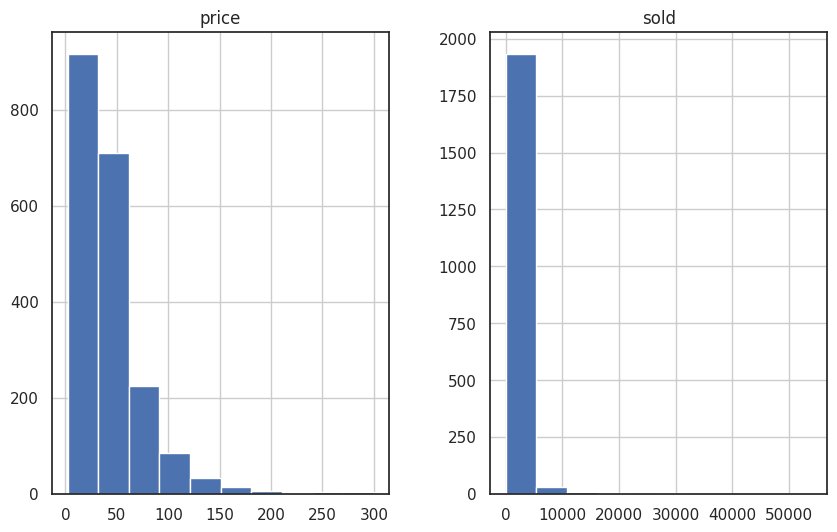

In [175]:
df_analisys = df.drop(columns=['priceWithCurrency', 'availableText','available',
                               'lastUpdated', 'itemLocation', 'is_woman'])  # remove só para analisar

df_analisys.hist(figsize=(10, 6), bins=10)


#Verificando se existem Outliers no dataset

In [176]:
# Selecionar apenas colunas numéricas
df_num = df.select_dtypes(include=['float64', 'int64'])

# Calcular assimetria e curtose
skew_vals = df_num.skew()
kurt_vals = df_num.kurt()

# Criar DataFrame consolidado
stats_dist = pd.DataFrame({
    'Skewness (Assimetria)': skew_vals,
    'Kurtosis (Curtose)': kurt_vals
}).sort_values(by='Skewness (Assimetria)', ascending=False)

# Exibir apenas o resultado final formatado
display(stats_dist)

print("""
• Skewness > 0   →   distribuição com cauda longa à direita.
• Skewness < 0   →   cauda longa à esquerda.
• Curtose  > 0   →   presença de valores extremos (outliers).
""")

,Skewness (Assimetria),Kurtosis (Curtose)
sold,11.303908,179.472137
available,7.287754,69.511196
price,2.503045,10.362222
is_woman,0.001001,-2.002003



• Skewness > 0   →   distribuição com cauda longa à direita.
• Skewness < 0   →   cauda longa à esquerda.
• Curtose  > 0   →   presença de valores extremos (outliers).



Podemos notar que a coluna sold possui valores extremos acredito que por se tratar de diferentes tipos de produtos, os valores sejam aceitáveis.
Para a coluna available ela não será utilizada ao longo da análise.

# Criando coluna concentration

In [177]:
def categorize_type(t):
    if pd.isna(t): return 'Outros'
    t = str(t).lower()

    if 'parfum' in t:
        if 'eau de parfum' in t or 'edp' in t: return 'Eau de Parfum'
        return 'Parfum'
    elif 'toilette' in t or 'edt' in t: return 'Eau de Toilette'
    elif 'cologne' in t or 'edc' in t: return 'Cologne'
    return 'Outros'

df['concentration'] = df['type'].apply(categorize_type)


 # Criando coluna de volume ml

In [178]:
import re

def extrair_volume_universal(texto):
    if not isinstance(texto, str):
        return None

    # Padronização inicial: minúsculas e troca vírgula por ponto
    texto = texto.lower().replace(',', '.')

    # 1. Tenta extrair ML primeiro (prioridade)
    # Padrão: número + opcionalmente espaço + 'ml'
    match_ml = re.search(r'(\d+\.?\d*)\s*ml', texto)
    if match_ml:
        return float(match_ml.group(1))

    # 2. Tenta extrair OZ / FL OZ (com ou sem pontos)
    # Padrão: número + espaço opcional + (fl + ponto opcional + espaço opcional) + oz + ponto opcional
    # Traduzindo: r'(\d+\.?\d*)\s*(?:fl\.?\s*)?oz\.?'
    match_oz = re.search(r'(\d+\.?\d*)\s*(?:fl\.?\s*)?oz\.?', texto)

    if match_oz:
        valor_oz = float(match_oz.group(1))
        # Conversão padrão: 1 oz ≈ 29.57 ml
        return round(valor_oz * 29.57, 2)

    return None

# Aplicando a função na coluna
df['ml'] = df['title'].apply(extrair_volume_universal)

print(df[['title', 'ml']])

                                                                                 title      ml
0                              Christian Dior Sauvage Men's EDP 3.4 oz Fragrance Spray  100.54
1       A-v-entus Eau de Parfum 3.3 oz 100ML Millesime EDP Col-ogne for Men New In Box  100.00
2                                                     HOGO BOSS cologne For Men 3.4 oz  100.54
3     Acqua Di Gio by Giorgio Armani 6.7 Fl oz Eau De Toilette Spray Men' New & Sealed  198.12
4            Lattafa Men's Hayaati Al Maleky EDP Spray 3.4 oz Fragrances 6291108734056  100.54
...                                                                                ...     ...
1995           Avon Far Away Infinity Eau de Parfum 1.7 fl. oz.  NIB/Free Travel Spray   50.27
1996              Roses Greedy by Mancera perfume for unisex EDP 4 / 4.0 oz New in Box  118.28
1997                             Sweet Tooth Eau de Parfum, Perfume for Women, 1 fl oz   29.57
1998            MMMM BY Juliette Has A Gun perfume

# Criando coluna market_segment
Classificando os produtos em Tester ou Regular

In [179]:
# Identificação de Testers vs Regulares
def classify_item(title):
    t = str(title).lower()
    if 'tester' in t or 'testador' in t:
        return 'Tester'
    return 'Regular (Lacrado)'

df['market_segment'] = df['title'].apply(classify_item)

# Criando coluna is_entry_level
 niveis de entrada

In [180]:
def is_entry_level(title):
    title = str(title).lower()
    keywords = ['vial', 'mini', 'sample', 'travel', 'open box', 'decant']
    return any(kw in title for kw in keywords)

df['is_entry_level'] = df['title'].apply(is_entry_level)
#df.head(10)

# Criando variavel de classificacao de volume de vendas

In [181]:

# 1. Preparação e cálculo dos limites
# df['sold'] deve estar preenchido (fillnas com 0 se necessário)
p50 = df['sold'].median()
p90 = df['sold'].quantile(0.90)

print(f"Ponto de corte para Médio (Mediana): {p50}")
print(f"Ponto de corte para Alto (Percentil 90): {p90}")

# 2. Função de categorização dinâmica
def categoriza_vendas_percentil(sold):
    if sold <= p50:
        return 'Baixo'
    elif sold <= p90:
        return 'Médio'
    else:
        return 'Alto'

# 3. Aplicação da nova feature
df['categoria_vendas'] = df['sold'].apply(categoriza_vendas_percentil)

# 4. Verificação da distribuição para o modelo
print(df['categoria_vendas'].value_counts())


Ponto de corte para Médio (Mediana): 51.0
Ponto de corte para Alto (Percentil 90): 1370.8000000000002
categoria_vendas
Baixo    992
Médio    787
Alto     220
Name: count, dtype: int64


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1999 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              1997 non-null   object 
 1   title              1999 non-null   object 
 2   type               1994 non-null   object 
 3   price              1999 non-null   float64
 4   priceWithCurrency  1999 non-null   object 
 5   available          1757 non-null   float64
 6   availableText      1988 non-null   object 
 7   sold               1977 non-null   float64
 8   lastUpdated        1874 non-null   object 
 9   itemLocation       1999 non-null   object 
 10  is_woman           1999 non-null   int64  
 11  concentration      1999 non-null   object 
 12  ml                 1895 non-null   float64
 13  market_segment     1999 non-null   object 
 14  is_entry_level     1999 non-null   bool   
 15  categoria_vendas   1999 non-null   object 
dtypes: bool(1), float64(4), int64

#Matriz de Correlação - Relações entre Variáveis

##Análise Bivariada

Colunas numéricas incluídas na correlação (5):
['price', 'available', 'sold', 'is_woman', 'ml']


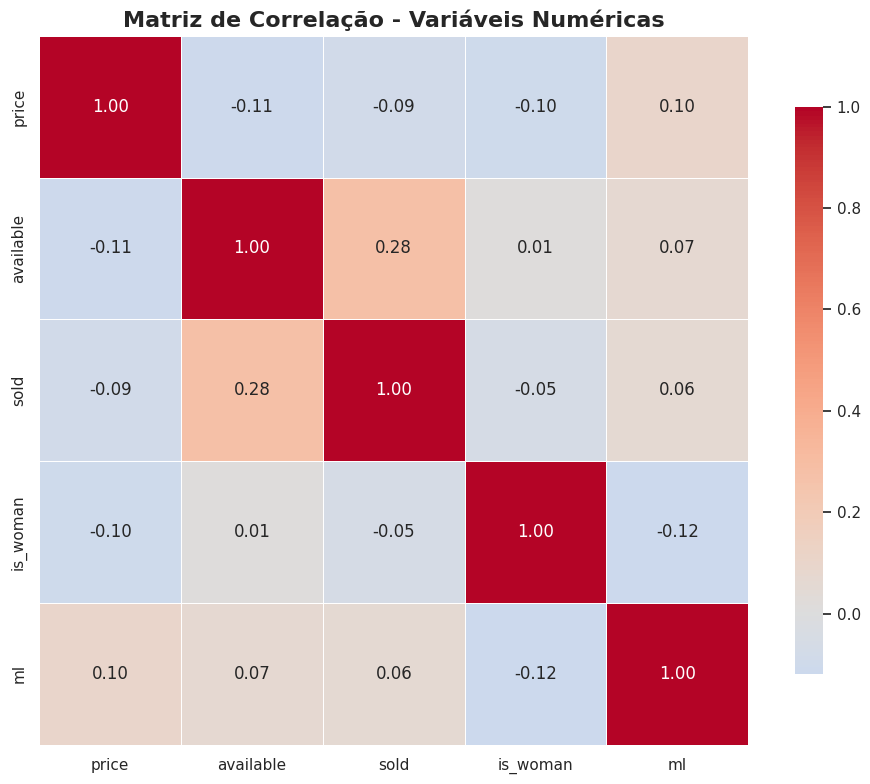


Variáveis mais correlacionadas com o Genero:


,is_woman
available,0.012335
sold,-0.054339
price,-0.101110
ml,-0.118534


In [183]:
# Selecionar apenas variáveis VERDADEIRAMENTE numéricas
# Isso automaticamente exclui categóricas (object dtype)
df_numeric = df.select_dtypes(include=['float64', 'int64'])

print(f"Colunas numéricas incluídas na correlação ({len(df_numeric.columns)}):")
print(df_numeric.columns.tolist())

# Calcular matriz de correlação
correlation_matrix = df_numeric.corr()

# Criar figura com tamanho adequado
plt.figure(figsize=(10, 8))

# Criar heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,  # Mostrar valores
    fmt='.2f',   # Formato com 2 casas decimais
    cmap='coolwarm',  # Paleta de cores
    center=0,    # Centralizar em 0
    square=True, # Células quadradas
    linewidths=0.5,  # Linhas entre células
    cbar_kws={'shrink': 0.8}  # Ajustar barra de cores
)

plt.title('Matriz de Correlação - Variáveis Numéricas', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nVariáveis mais correlacionadas com o Genero:")
vendas_correlations = correlation_matrix['is_woman'].drop('is_woman').sort_values(ascending=False)
display(vendas_correlations)

Text(0, 0.5, 'Preço (USD)')

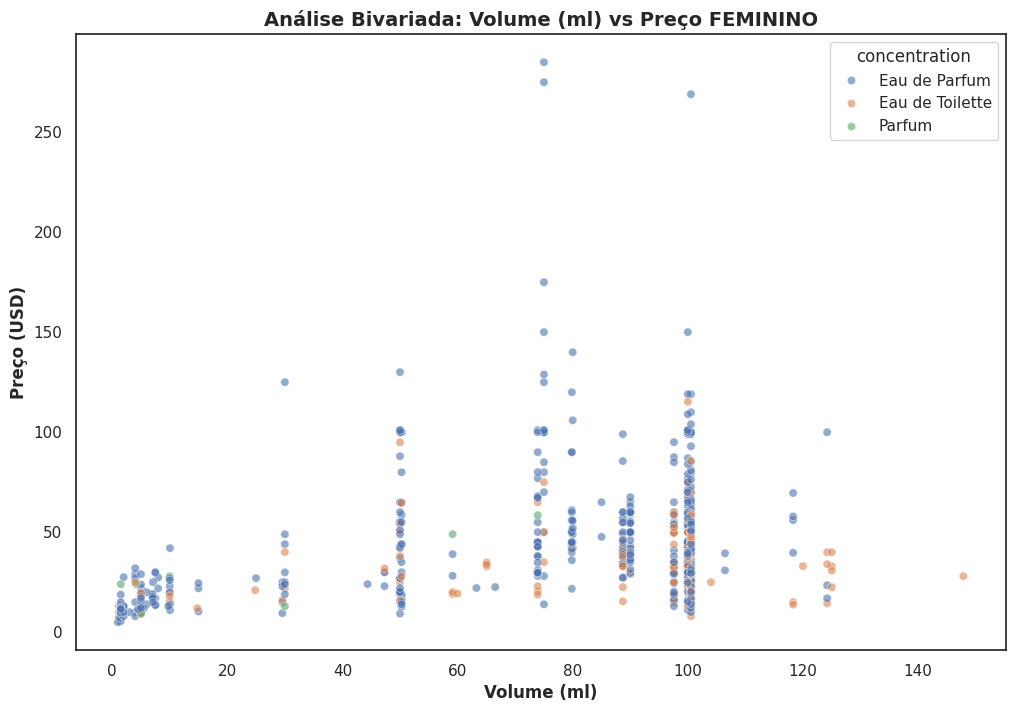

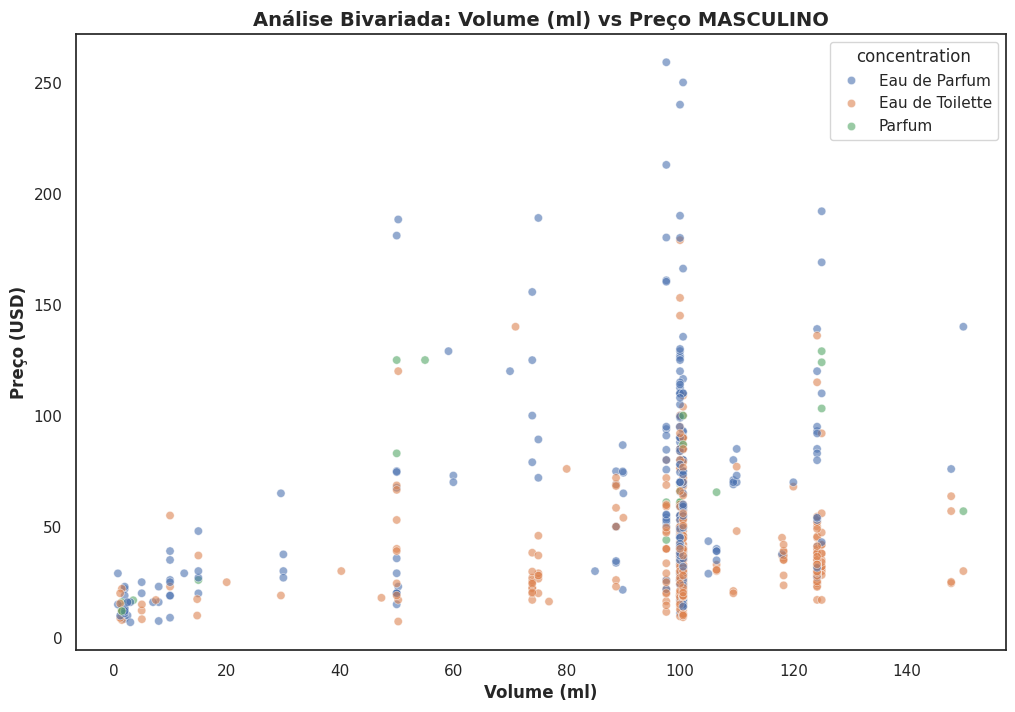

In [184]:
# Filtro para visualização (removendo outliers de volume e preços nulos)
df_clean = df[(df['ml'] > 0) & (df['ml'] <= 150) & (df['price'].notna())].copy()

lista_concentracao = ['Eau de Parfum', 'Eau de Toilette', 'Parfum', 'Eau de Cologne']
df_filtrado_feminino = df_clean[(df_clean['concentration'].isin(lista_concentracao)) & (df_clean['is_woman']==1)]

df_filtrado_masculino = df_clean[(df_clean['concentration'].isin(lista_concentracao)) & (df_clean['is_woman']==0)]


# =============================================================================
# 3. VISUALIZAÇÃO (FEMININO)
# =============================================================================

# Paleta institucional: Verde Ânfora e Dourado
cores_boticario = ["#005E41", "#CBA858"]
sns.set_theme(style="white")

# --- Gráfico 1: Volume (ml) vs Preço por Segmento ---
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_filtrado_feminino, x='ml', y='price', hue='concentration',
     alpha=0.6
)
plt.title('Análise Bivariada: Volume (ml) vs Preço FEMININO', fontsize=14, fontweight='bold')
plt.xlabel('Volume (ml)', fontweight='bold')
plt.ylabel('Preço (USD)', fontweight='bold')



# =============================================================================
# 3. VISUALIZAÇÃO (MASCULINO)
# =============================================================================

# Paleta institucional: Verde Ânfora e Dourado
cores_boticario = ["#005E41", "#CBA858"]
sns.set_theme(style="white")

# --- Gráfico 1: Volume (ml) vs Preço por Segmento ---
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_filtrado_masculino, x='ml', y='price', hue='concentration',
     alpha=0.6
)
plt.title('Análise Bivariada: Volume (ml) vs Preço MASCULINO', fontsize=14, fontweight='bold')
plt.xlabel('Volume (ml)', fontweight='bold')
plt.ylabel('Preço (USD)', fontweight='bold')


Text(0, 0.5, 'Volume (ml)')

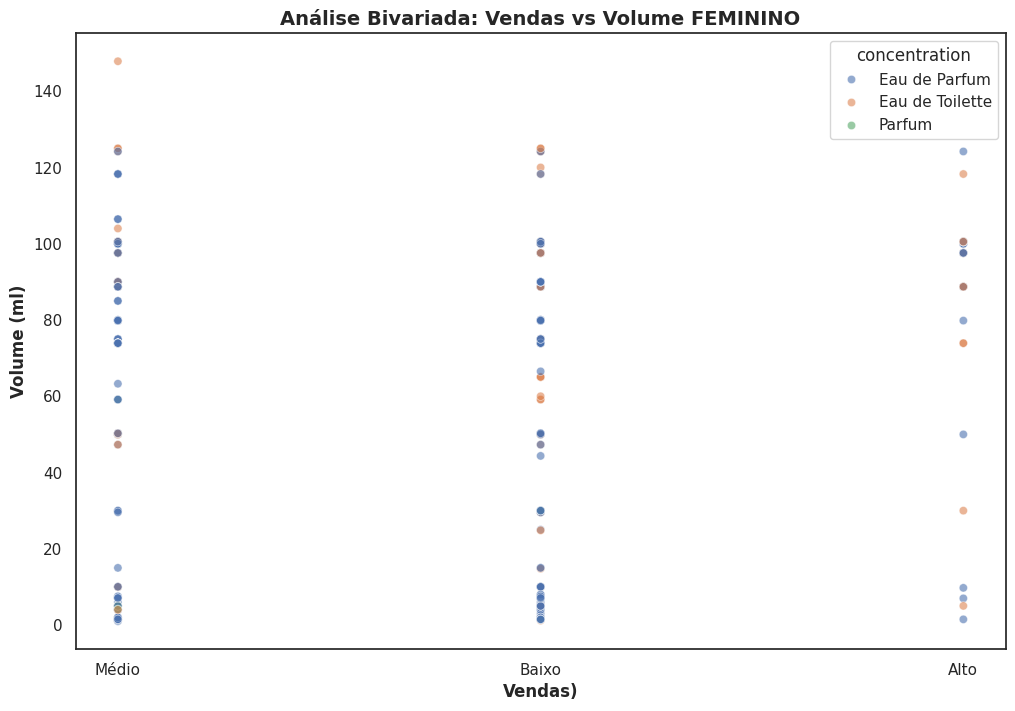

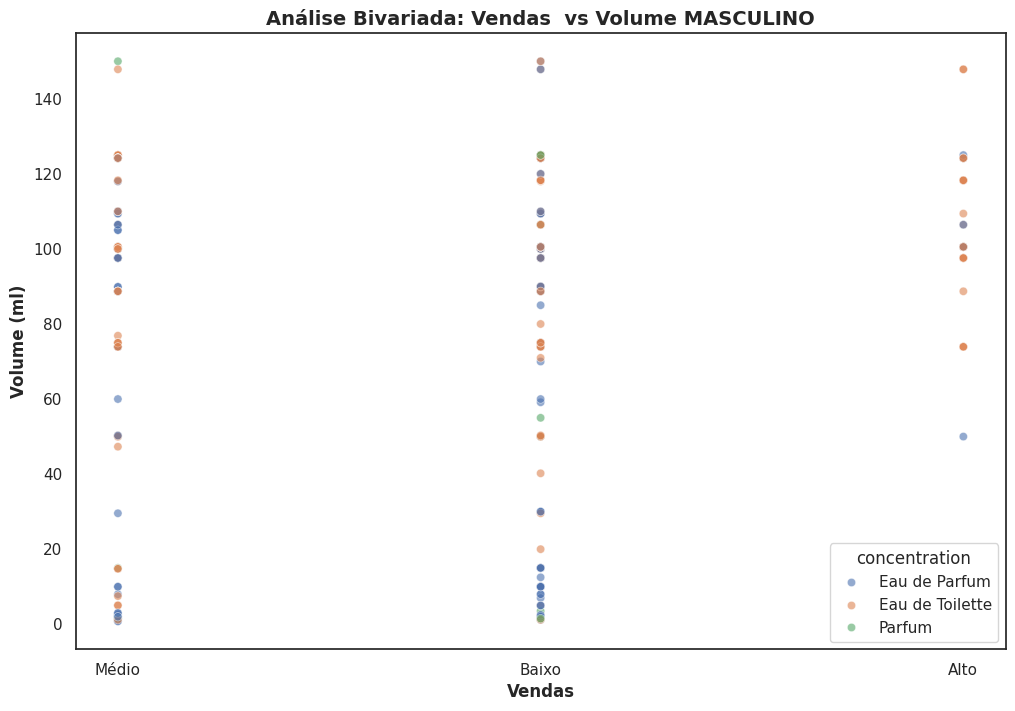

In [185]:
# Filtro para visualização (removendo outliers de volume e preços nulos)
df_clean = df[(df['ml'] > 0) & (df['ml'] <= 150) & (df['price'].notna())].copy()

lista_concentracao = ['Eau de Parfum', 'Eau de Toilette', 'Parfum', 'Eau de Cologne']
df_filtrado_feminino = df_clean[(df_clean['concentration'].isin(lista_concentracao)) & (df_clean['is_woman']==1)]

df_filtrado_masculino = df_clean[(df_clean['concentration'].isin(lista_concentracao)) & (df_clean['is_woman']==0)]


# =============================================================================
# 3. VISUALIZAÇÃO (FEMININO)
# =============================================================================

# Paleta institucional: Verde Ânfora e Dourado
cores_boticario = ["#005E41", "#CBA858"]
sns.set_theme(style="white")

# --- Gráfico 1: Volume (ml) vs Preço por Segmento ---
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_filtrado_feminino, x='categoria_vendas', y='ml', hue='concentration',
     alpha=0.6
)
plt.title('Análise Bivariada: Vendas vs Volume FEMININO', fontsize=14, fontweight='bold')
plt.xlabel('Vendas)', fontweight='bold')
plt.ylabel('Volume (ml)', fontweight='bold')




# =============================================================================
# 3. VISUALIZAÇÃO (MASCULINO)
# =============================================================================

# Paleta institucional: Verde Ânfora e Dourado
cores_boticario = ["#005E41", "#CBA858"]
sns.set_theme(style="white")

# --- Gráfico 1: Volume (ml) vs Preço por Segmento ---
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_filtrado_masculino, x='categoria_vendas', y='ml', hue='concentration',
     alpha=0.6
)
plt.title('Análise Bivariada: Vendas  vs Volume MASCULINO', fontsize=14, fontweight='bold')
plt.xlabel('Vendas', fontweight='bold')
plt.ylabel('Volume (ml)', fontweight='bold')

Text(0, 0.5, 'Preço (USD)')

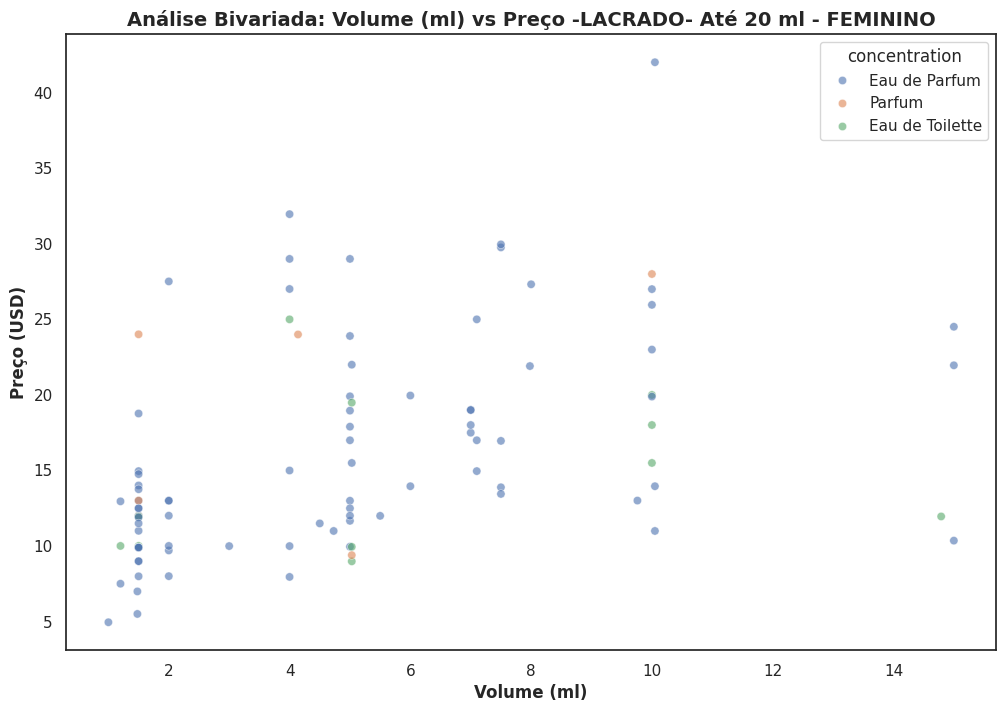

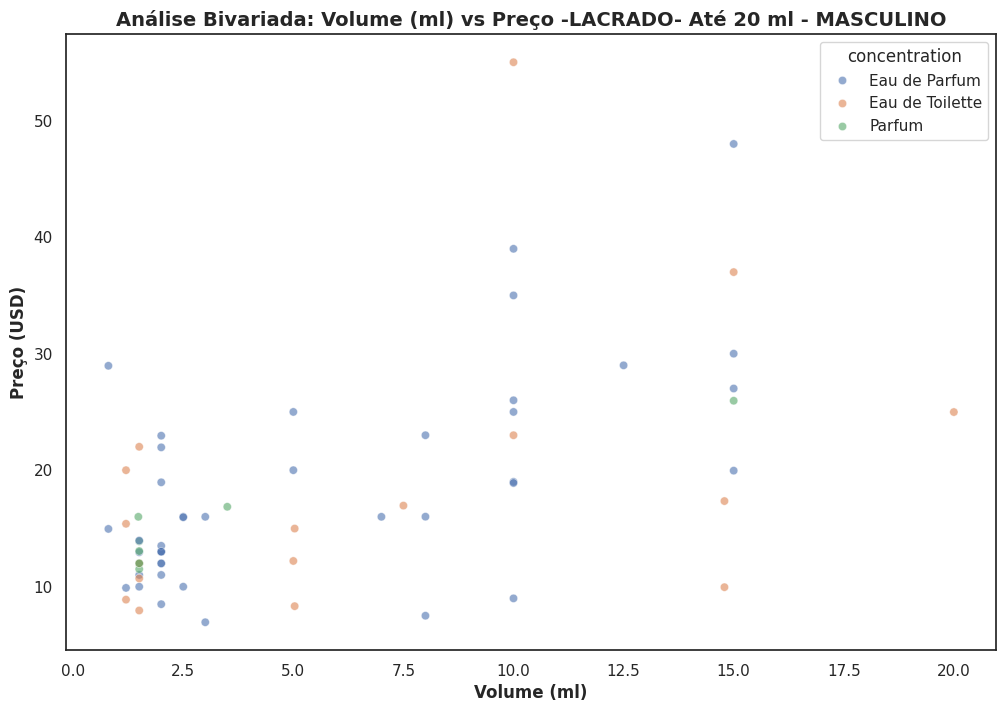

In [186]:

# Filtro para visualização (removendo outliers de volume e preços nulos)
df_clean = df[(df['ml'] > 0) & (df['ml'] <= 20) & (df['price'].notna())].copy()

lista_concentracao = ['Eau de Parfum', 'Eau de Toilette', 'Parfum', 'Eau de Cologne']
df_filtrado_feminino = df_clean[(df_clean['concentration'].isin(lista_concentracao)) & (df_clean['market_segment'] != 'Tester') & (df_clean['is_woman']==1)]

df_filtrado_masculino = df_clean[(df_clean['concentration'].isin(lista_concentracao)) & (df_clean['market_segment'] != 'Tester') & (df_clean['is_woman']==0)]


# =============================================================================
# 3. VISUALIZAÇÃO (FEMININO)
# =============================================================================

# Paleta institucional: Verde Ânfora e Dourado
cores_boticario = ["#005E41", "#CBA858"]
sns.set_theme(style="white")

# --- Gráfico 1: Volume (ml) vs Preço por Segmento ---
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_filtrado_feminino, x='ml', y='price', hue='concentration',
     alpha=0.6
)
plt.title('Análise Bivariada: Volume (ml) vs Preço -LACRADO- Até 20 ml - FEMININO', fontsize=14, fontweight='bold')
plt.xlabel('Volume (ml)', fontweight='bold')
plt.ylabel('Preço (USD)', fontweight='bold')



# =============================================================================
# 3. VISUALIZAÇÃO (MASCULINO)
# =============================================================================

# Paleta institucional: Verde Ânfora e Dourado
cores_boticario = ["#005E41", "#CBA858"]
sns.set_theme(style="white")

# --- Gráfico 1: Volume (ml) vs Preço por Segmento ---
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_filtrado_masculino, x='ml', y='price', hue='concentration',
     alpha=0.6
)
plt.title('Análise Bivariada: Volume (ml) vs Preço -LACRADO- Até 20 ml - MASCULINO', fontsize=14, fontweight='bold')
plt.xlabel('Volume (ml)', fontweight='bold')
plt.ylabel('Preço (USD)', fontweight='bold')


Text(0, 0.5, 'Volume (ml)')

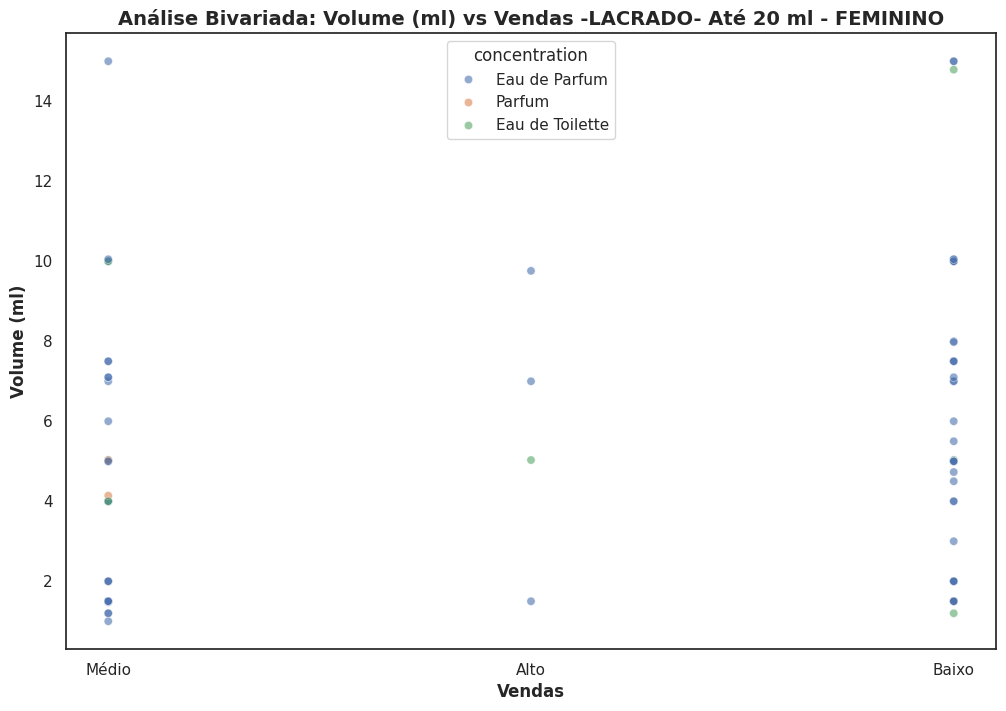

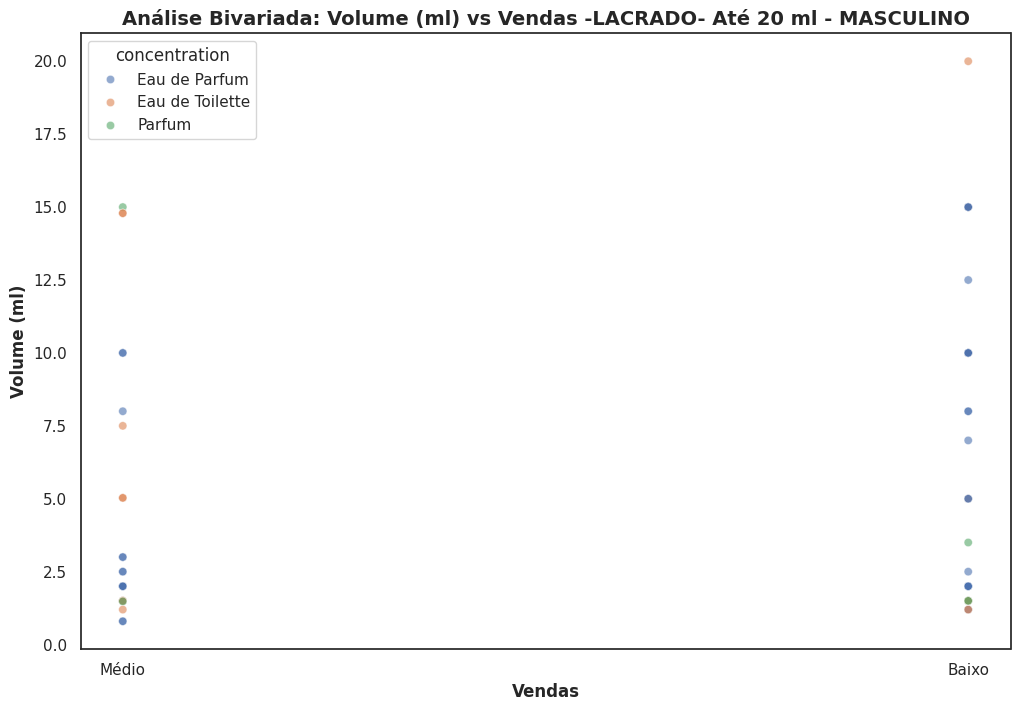

In [187]:
# Filtro para visualização (removendo outliers de volume e preços nulos)
df_clean = df[(df['ml'] > 0) & (df['ml'] <= 20) & (df['price'].notna())].copy()

lista_concentracao = ['Eau de Parfum', 'Eau de Toilette', 'Parfum', 'Eau de Cologne']
df_filtrado_feminino = df_clean[(df_clean['concentration'].isin(lista_concentracao)) & (df_clean['market_segment'] != 'Tester') & (df_clean['is_woman']==1)]

df_filtrado_masculino = df_clean[(df_clean['concentration'].isin(lista_concentracao)) & (df_clean['market_segment'] != 'Tester') & (df_clean['is_woman']==0)]


# =============================================================================
# 3. VISUALIZAÇÃO (FEMININO)
# =============================================================================

# Paleta institucional: Verde Ânfora e Dourado
cores_boticario = ["#005E41", "#CBA858"]
sns.set_theme(style="white")

# --- Gráfico 1: Volume (ml) vs Preço por Segmento ---
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_filtrado_feminino, x='categoria_vendas', y='ml', hue='concentration',
     alpha=0.6
)
plt.title('Análise Bivariada: Volume (ml) vs Vendas -LACRADO- Até 20 ml - FEMININO', fontsize=14, fontweight='bold')
plt.xlabel('Vendas', fontweight='bold')
plt.ylabel('Volume (ml)', fontweight='bold')



# =============================================================================
# 3. VISUALIZAÇÃO (MASCULINO)
# =============================================================================

# Paleta institucional: Verde Ânfora e Dourado
cores_boticario = ["#005E41", "#CBA858"]
sns.set_theme(style="white")

# --- Gráfico 1: Volume (ml) vs Preço por Segmento ---
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_filtrado_masculino, x='categoria_vendas', y='ml', hue='concentration',
     alpha=0.6
)
plt.title('Análise Bivariada: Volume (ml) vs Vendas -LACRADO- Até 20 ml - MASCULINO', fontsize=14, fontweight='bold')
plt.xlabel('Vendas', fontweight='bold')
plt.ylabel('Volume (ml)', fontweight='bold')


Text(0, 0.5, 'Preço (USD)')

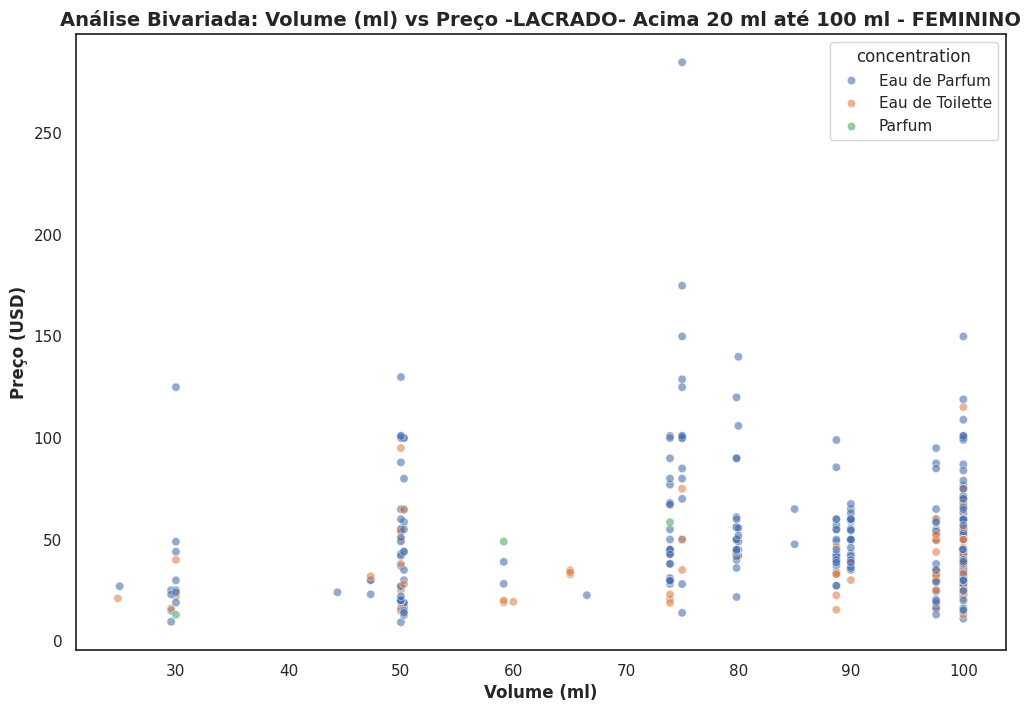

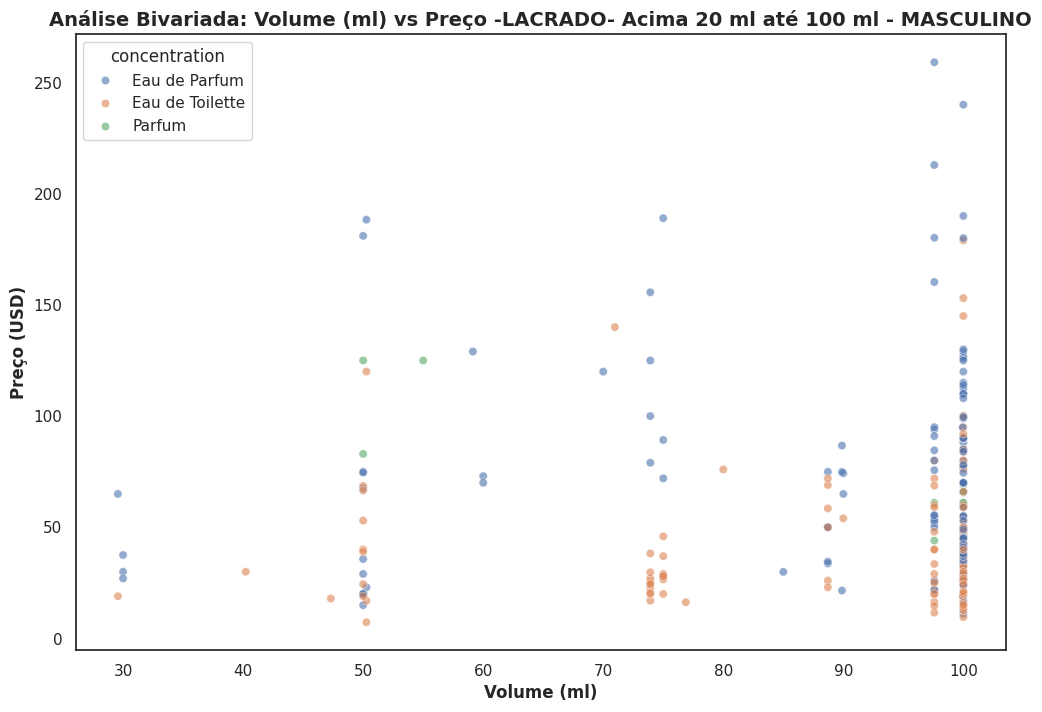

In [188]:

# Filtro para visualização (removendo outliers de volume e preços nulos)
df_clean = df[(df['ml'] > 0) & (df['ml'] > 20) &(df['ml'] <= 100) & (df['price'].notna())].copy()

lista_concentracao = ['Eau de Parfum', 'Eau de Toilette', 'Parfum', 'Eau de Cologne']
df_filtrado_feminino = df_clean[(df_clean['concentration'].isin(lista_concentracao)) & (df_clean['market_segment'] != 'Tester')& (df_clean['is_woman']==1)]

df_filtrado_masculino = df_clean[(df_clean['concentration'].isin(lista_concentracao)) & (df_clean['market_segment'] != 'Tester') & (df_clean['is_woman']==0)]



# =============================================================================
# 3. VISUALIZAÇÃO (FEMININO)
# =============================================================================

# Paleta institucional: Verde Ânfora e Dourado
cores_boticario = ["#005E41", "#CBA858"]
sns.set_theme(style="white")

# --- Gráfico 1: Volume (ml) vs Preço por Segmento ---
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_filtrado_feminino, x='ml', y='price', hue='concentration',
     alpha=0.6
)
plt.title('Análise Bivariada: Volume (ml) vs Preço -LACRADO- Acima 20 ml até 100 ml - FEMININO', fontsize=14, fontweight='bold')
plt.xlabel('Volume (ml)', fontweight='bold')
plt.ylabel('Preço (USD)', fontweight='bold')


# =============================================================================
# 3. VISUALIZAÇÃO (MASCULINO)
# =============================================================================

# Paleta institucional: Verde Ânfora e Dourado
cores_boticario = ["#005E41", "#CBA858"]
sns.set_theme(style="white")

# --- Gráfico 1: Volume (ml) vs Preço por Segmento ---
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_filtrado_masculino, x='ml', y='price', hue='concentration',
     alpha=0.6
)
plt.title('Análise Bivariada: Volume (ml) vs Preço -LACRADO- Acima 20 ml até 100 ml - MASCULINO', fontsize=14, fontweight='bold')
plt.xlabel('Volume (ml)', fontweight='bold')
plt.ylabel('Preço (USD)', fontweight='bold')

Text(0, 0.5, 'Volume (ml)')

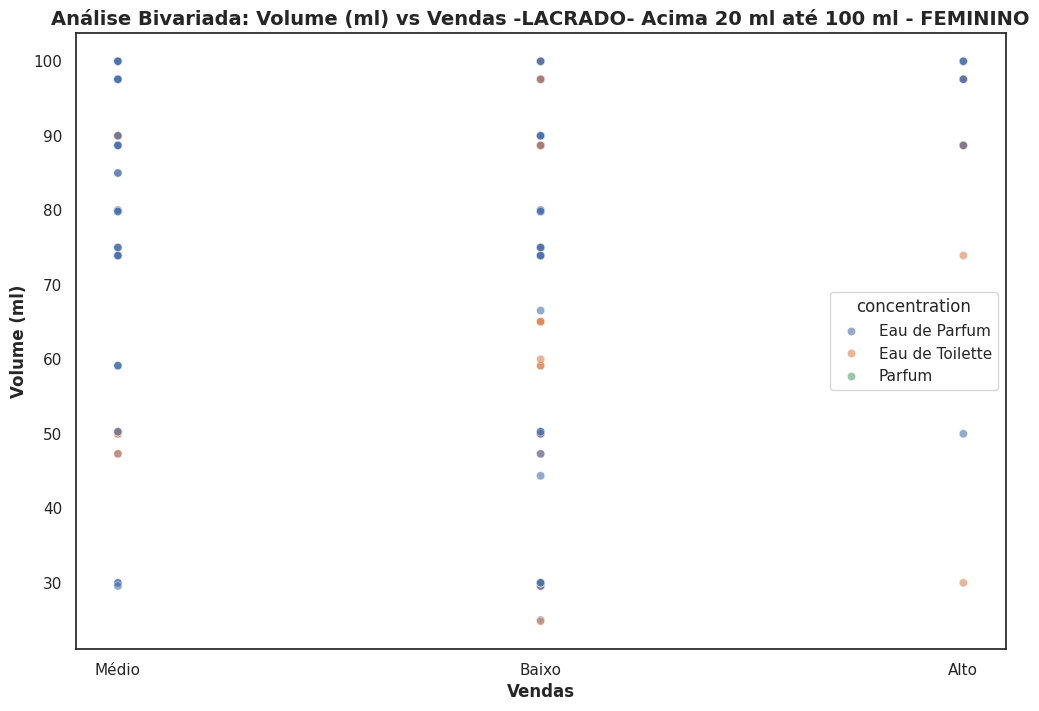

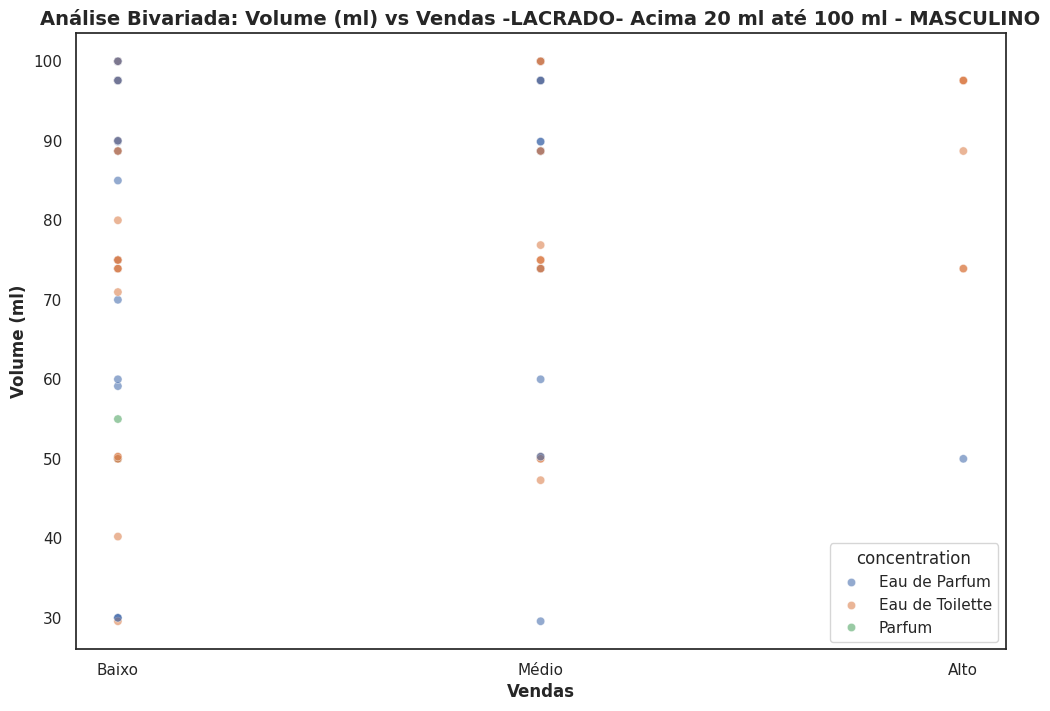

In [189]:
# Filtro para visualização (removendo outliers de volume e preços nulos)
df_clean = df[(df['ml'] > 0) & (df['ml'] > 20) &(df['ml'] <= 100) & (df['price'].notna())].copy()

lista_concentracao = ['Eau de Parfum', 'Eau de Toilette', 'Parfum', 'Eau de Cologne']
df_filtrado_feminino = df_clean[(df_clean['concentration'].isin(lista_concentracao)) & (df_clean['market_segment'] != 'Tester')& (df_clean['is_woman']==1)]

df_filtrado_masculino = df_clean[(df_clean['concentration'].isin(lista_concentracao)) & (df_clean['market_segment'] != 'Tester') & (df_clean['is_woman']==0)]


# =============================================================================
# 3. VISUALIZAÇÃO (FEMININO)
# =============================================================================

# Paleta institucional: Verde Ânfora e Dourado
cores_boticario = ["#005E41", "#CBA858"]
sns.set_theme(style="white")

# --- Gráfico 1: Volume (ml) vs Preço por Segmento ---
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_filtrado_feminino, x='categoria_vendas', y='ml', hue='concentration',
     alpha=0.6
)
plt.title('Análise Bivariada: Volume (ml) vs Vendas -LACRADO- Acima 20 ml até 100 ml - FEMININO', fontsize=14, fontweight='bold')
plt.xlabel('Vendas', fontweight='bold')
plt.ylabel('Volume (ml)', fontweight='bold')


# =============================================================================
# 3. VISUALIZAÇÃO (MASCULINO)
# =============================================================================

# Paleta institucional: Verde Ânfora e Dourado
cores_boticario = ["#005E41", "#CBA858"]
sns.set_theme(style="white")

# --- Gráfico 1: Volume (ml) vs Preço por Segmento ---
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_filtrado_masculino, x='categoria_vendas', y='ml', hue='concentration',
     alpha=0.6
)
plt.title('Análise Bivariada: Volume (ml) vs Vendas -LACRADO- Acima 20 ml até 100 ml - MASCULINO', fontsize=14, fontweight='bold')
plt.xlabel('Vendas', fontweight='bold')
plt.ylabel('Volume (ml)', fontweight='bold')

# Verificando frequência de concentration novo type

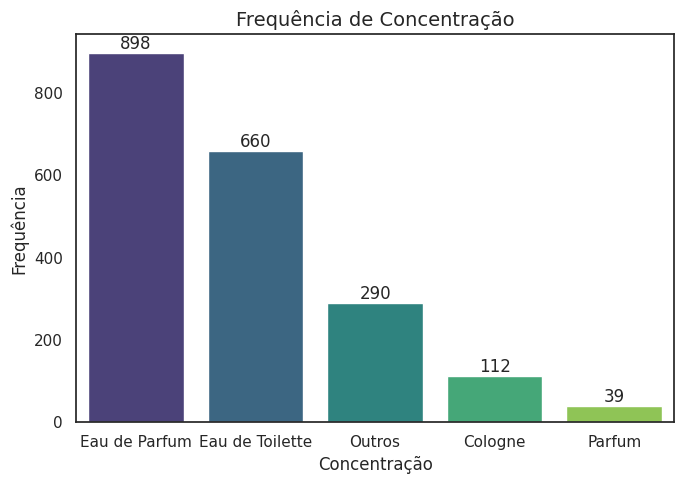

In [190]:
contagem = df['concentration'].value_counts().reset_index()
contagem.columns = ['concentration', 'Frequência']

plt.figure(figsize=(7, 5))

ax = sns.barplot(
    x='concentration',
    y='Frequência',
    data=contagem,
    palette='viridis',
    hue='concentration'
)


# Adicionar Rótulos de Dados (Frequência)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

plt.title('Frequência de Concentração', fontsize=14)
plt.xlabel('Concentração', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xticks(rotation=0)

# Ocultar a legenda (Correção alternativa ao erro)
if ax.legend_:
    ax.legend_.remove()

plt.tight_layout()
plt.show()

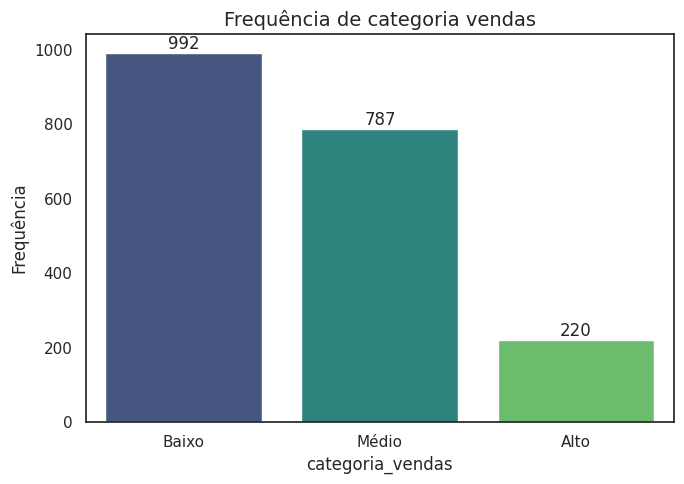

In [191]:
contagem = df['categoria_vendas'].value_counts().reset_index()
contagem.columns = ['categoria_vendas', 'Frequência']

plt.figure(figsize=(7, 5))

ax = sns.barplot(
    x='categoria_vendas',
    y='Frequência',
    data=contagem,
    palette='viridis',
    hue='categoria_vendas'
)


# Adicionar Rótulos de Dados (Frequência)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

plt.title('Frequência de categoria vendas', fontsize=14)
plt.xlabel('categoria_vendas', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xticks(rotation=0)

# Ocultar a legenda (Correção alternativa ao erro)
if ax.legend_:
    ax.legend_.remove()

plt.tight_layout()
plt.show()

In [192]:
#df.tail(30)

Text(0, 0.5, 'Preço (USD)')

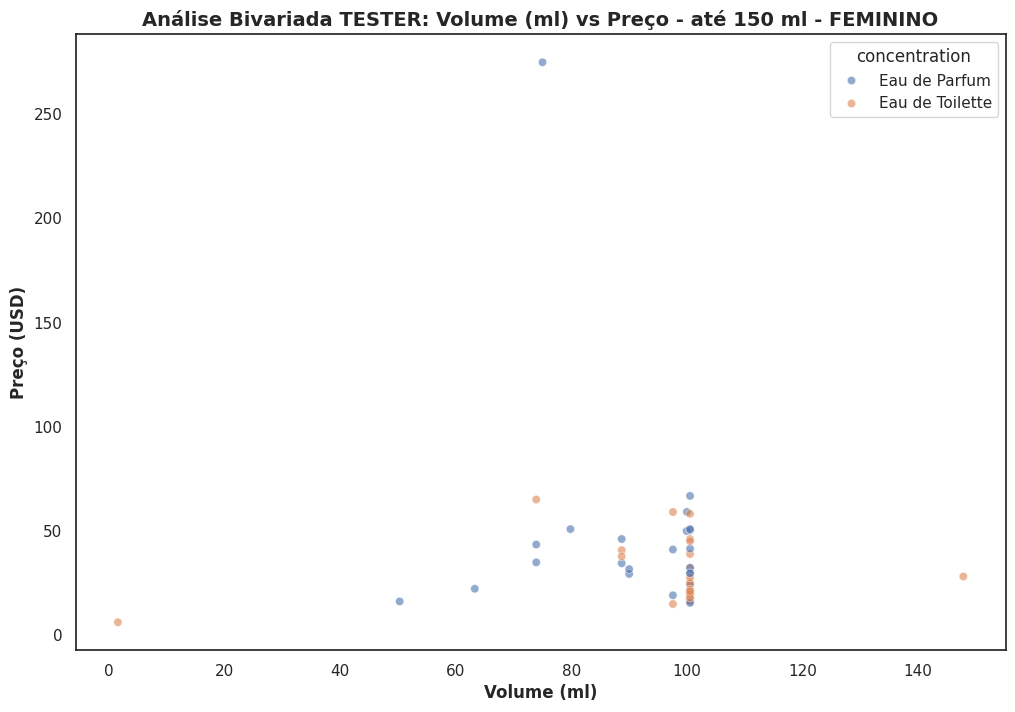

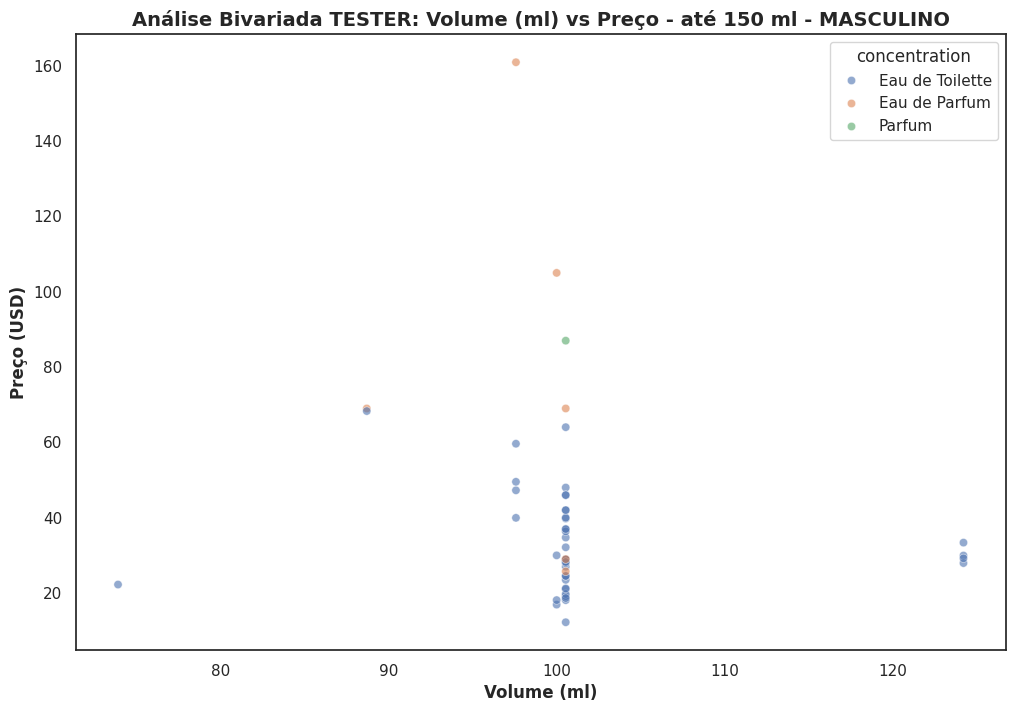

In [193]:
# Filtro para visualização (removendo outliers de volume e preços nulos)
df_clean = df[(df['ml'] > 0) &(df['ml'] <= 150) & (df['price'].notna())].copy()

lista_concentracao = ['Eau de Parfum', 'Eau de Toilette', 'Parfum', 'Eau de Cologne']
df_filtrado_feminino = df_clean[(df_clean['concentration'].isin(lista_concentracao)) & (df_clean['market_segment'] == 'Tester') & (df_clean['is_woman'] == 1)]

df_filtrado_masculino = df_clean[(df_clean['concentration'].isin(lista_concentracao)) & (df_clean['market_segment'] == 'Tester') & (df_clean['is_woman'] == 0)]

# =============================================================================
# 3. VISUALIZAÇÃO (FEMININO)
# =============================================================================

# Paleta institucional: Verde Ânfora e Dourado
cores_boticario = ["#005E41", "#CBA858"]
sns.set_theme(style="white")

# --- Gráfico 1: Volume (ml) vs Preço por Segmento ---
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_filtrado_feminino, x='ml', y='price', hue='concentration',
     alpha=0.6
)
plt.title('Análise Bivariada TESTER: Volume (ml) vs Preço - até 150 ml - FEMININO', fontsize=14, fontweight='bold')
plt.xlabel('Volume (ml)', fontweight='bold')
plt.ylabel('Preço (USD)', fontweight='bold')




# =============================================================================
# 3. VISUALIZAÇÃO (MASCULINO)
# =============================================================================

# Paleta institucional: Verde Ânfora e Dourado
cores_boticario = ["#005E41", "#CBA858"]
sns.set_theme(style="white")

# --- Gráfico 1: Volume (ml) vs Preço por Segmento ---
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_filtrado_masculino, x='ml', y='price', hue='concentration',
     alpha=0.6
)
plt.title('Análise Bivariada TESTER: Volume (ml) vs Preço - até 150 ml - MASCULINO', fontsize=14, fontweight='bold')
plt.xlabel('Volume (ml)', fontweight='bold')
plt.ylabel('Preço (USD)', fontweight='bold')


# Verificando a frequencia de testers

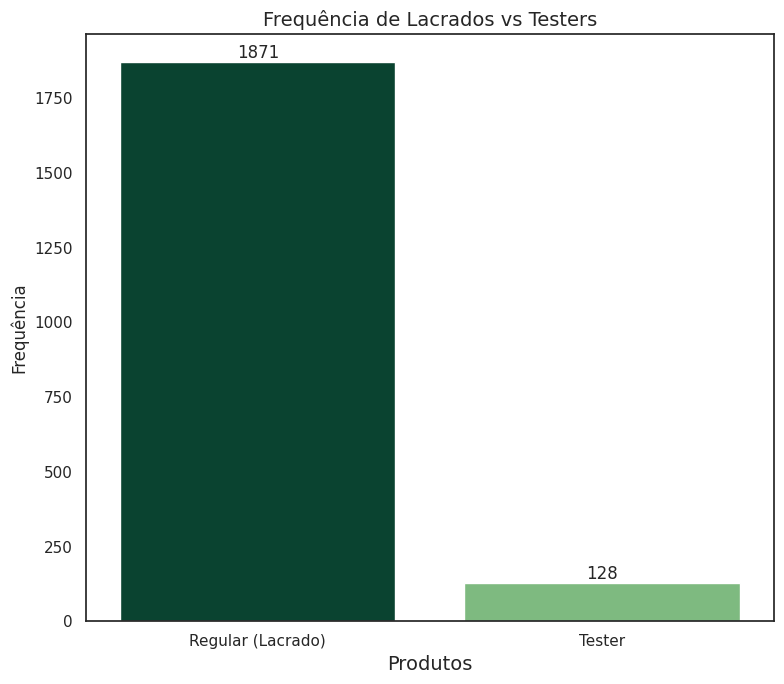

In [194]:
contagem = df['market_segment'].value_counts().reset_index()
contagem.columns = ['market_segment', 'Frequência']
boticario_gender_palette = {'Regular (Lacrado)': '#004d33', 'Tester': '#74c476'}
plt.figure(figsize=(8, 7))

ax = sns.barplot(
    x='market_segment',
    y='Frequência',
    data=contagem,
    palette=boticario_gender_palette,
    hue='market_segment'
)


# Adicionar Rótulos de Dados (Frequência)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

plt.title('Frequência de Lacrados vs Testers', fontsize=14)
plt.xlabel('Produtos', fontsize=14)
plt.ylabel('Frequência', fontsize=12)
plt.xticks(rotation=0)

# Ocultar a legenda (Correção alternativa ao erro)
if ax.legend_:
    ax.legend_.remove()

plt.tight_layout()
plt.show()

Neste cenário podemos notar que existe público para as versões do tipo tester tendo a frequencia de 128. Ou seja, produtos que não acompanham a sua embalagem (caixa/frasco/tampa). Público que buscar o conteúdo e não a embalagem

#Verificando frequencia dos niveis de entrada

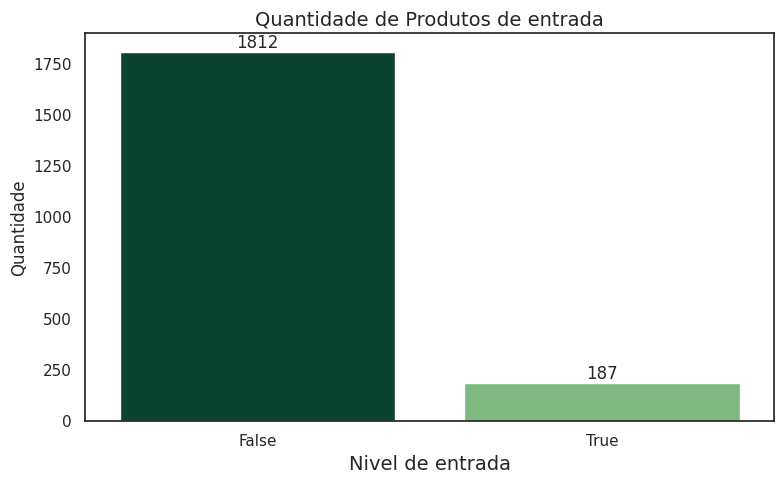

In [195]:
contagem = df['is_entry_level'].value_counts().reset_index()
contagem.columns = ['is_entry_level', 'Frequência']
boticario_gender_palette = {0: '#004d33', 1: '#74c476'}
plt.figure(figsize=(8, 5))

ax = sns.barplot(
    x='is_entry_level',
    y='Frequência',
    data=contagem,
    palette=boticario_gender_palette,
    hue='is_entry_level'
)


# Adicionar Rótulos de Dados (Frequência)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

plt.title('Quantidade de Produtos de entrada', fontsize=14)
plt.xlabel('Nivel de entrada', fontsize=14)
plt.ylabel('Quantidade', fontsize=12)
plt.xticks(rotation=0)

# Ocultar a legenda (Correção alternativa ao erro)
if ax.legend_:
    ax.legend_.remove()

plt.tight_layout()
plt.show()

Temos um total de 315 que compra produtos nas duas versões de entrada da marca. Ou seja, produtos nas duas versoes menores.

Text(0, 0.5, 'Preço (USD)')

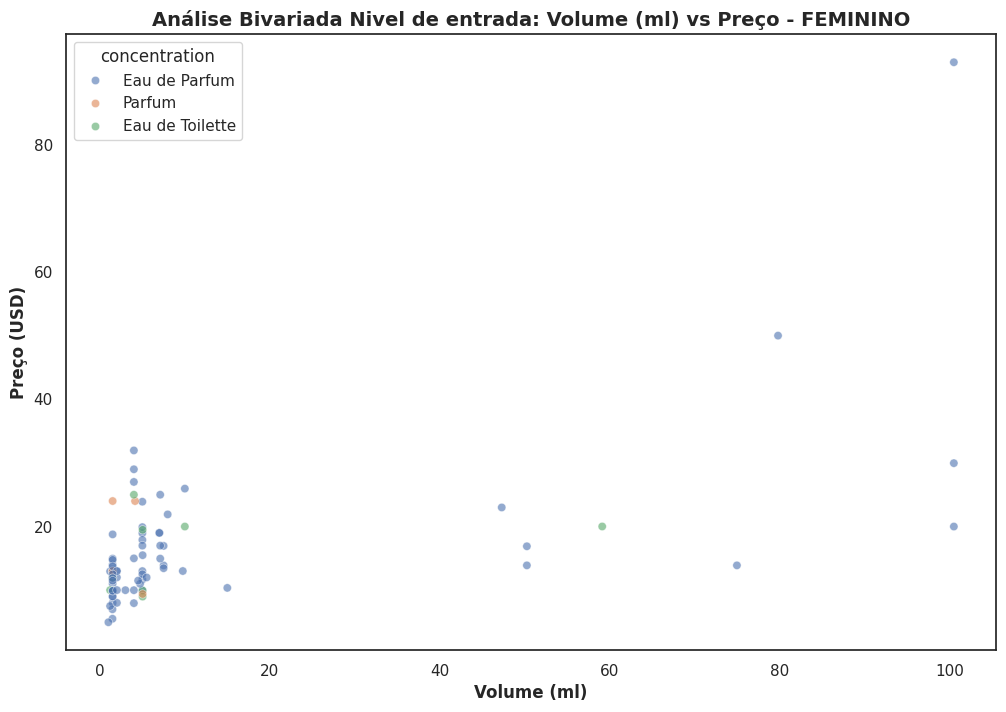

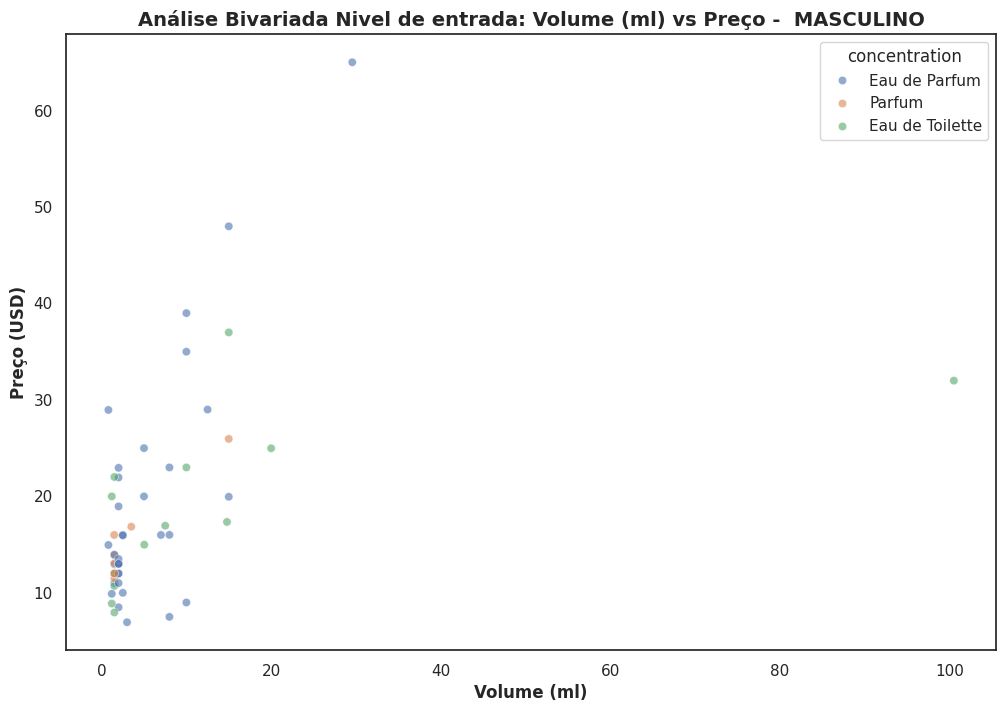

In [196]:
# Filtro para visualização (removendo outliers de volume e preços nulos)
df_clean = df[(df['is_entry_level'] == True) & (df['ml']<200) & (df['price'].notna())].copy()

lista_concentracao = ['Eau de Parfum', 'Eau de Toilette', 'Parfum', 'Eau de Cologne']
df_filtrado_feminino = df_clean[(df_clean['concentration'].isin(lista_concentracao)) &  (df_clean['is_woman'] == 1)]

df_filtrado_masculino = df_clean[(df_clean['concentration'].isin(lista_concentracao)) & (df_clean['is_woman'] == 0)]

# =============================================================================
# 3. VISUALIZAÇÃO (FEMININO)
# =============================================================================

# Paleta institucional: Verde Ânfora e Dourado
cores_boticario = ["#005E41", "#CBA858"]
sns.set_theme(style="white")

# --- Gráfico 1: Volume (ml) vs Preço por Segmento ---
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_filtrado_feminino, x='ml', y='price', hue='concentration',
     alpha=0.6
)
plt.title('Análise Bivariada Nivel de entrada: Volume (ml) vs Preço - FEMININO', fontsize=14, fontweight='bold')
plt.xlabel('Volume (ml)', fontweight='bold')
plt.ylabel('Preço (USD)', fontweight='bold')




# =============================================================================
# 3. VISUALIZAÇÃO (MASCULINO)
# =============================================================================

# Paleta institucional: Verde Ânfora e Dourado
cores_boticario = ["#005E41", "#CBA858"]
sns.set_theme(style="white")

# --- Gráfico 1: Volume (ml) vs Preço por Segmento ---
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_filtrado_masculino, x='ml', y='price', hue='concentration',
     alpha=0.6
)
plt.title('Análise Bivariada Nivel de entrada: Volume (ml) vs Preço -  MASCULINO', fontsize=14, fontweight='bold')
plt.xlabel('Volume (ml)', fontweight='bold')
plt.ylabel('Preço (USD)', fontweight='bold')

Text(0, 0.5, 'Volume (ml)')

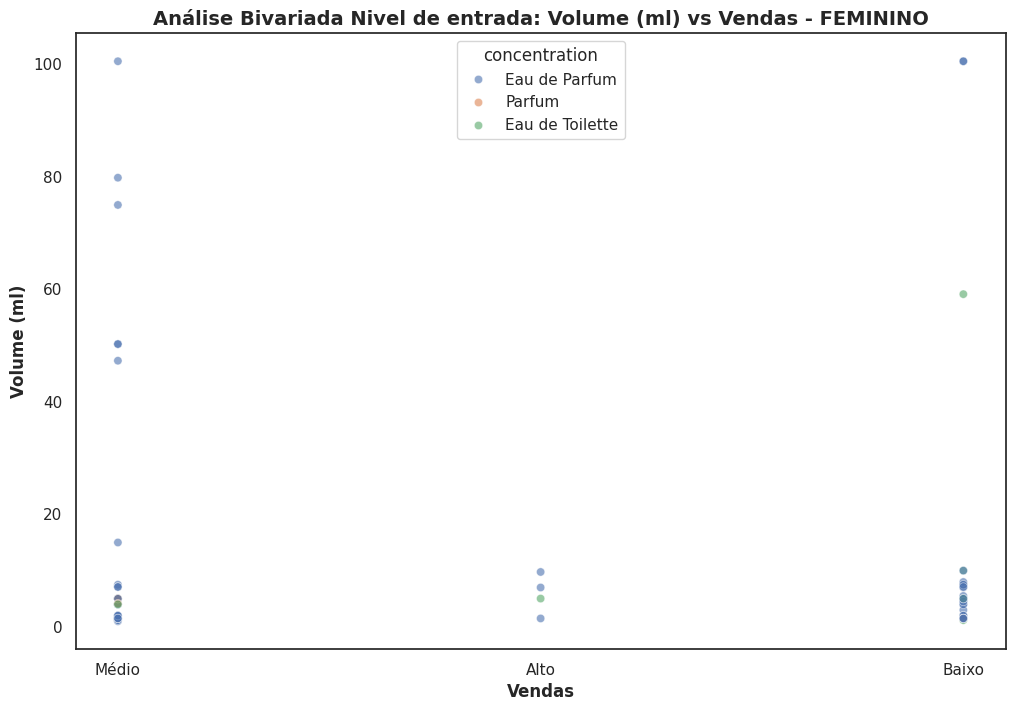

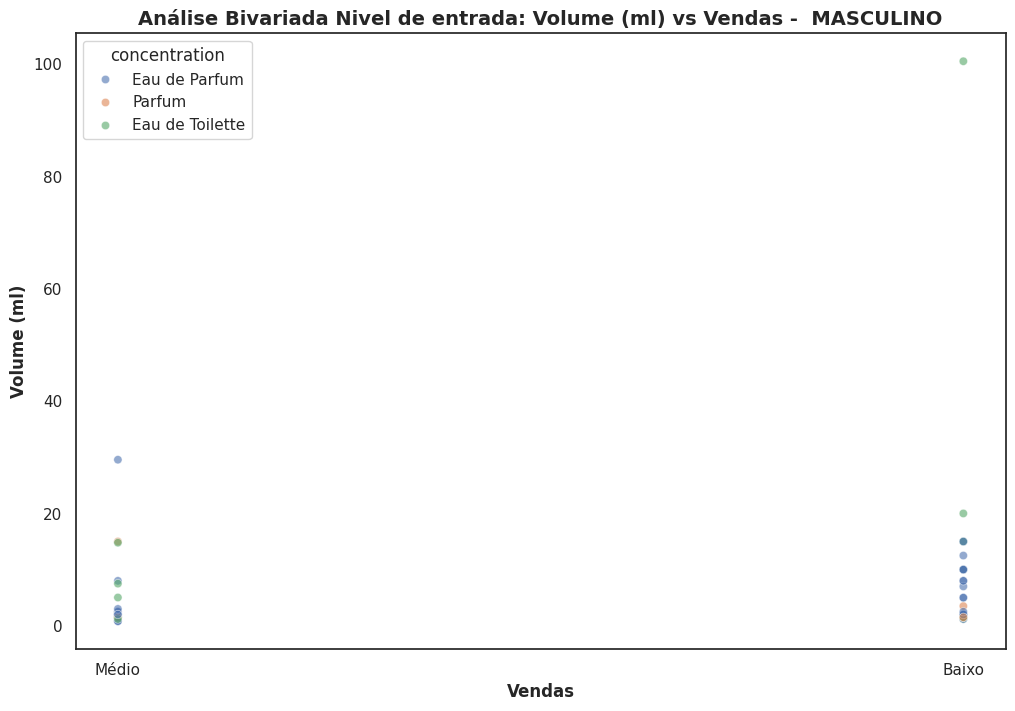

In [197]:
# Filtro para visualização (removendo outliers de volume e preços nulos)
df_clean = df[(df['is_entry_level'] == True) & (df['ml']<200) & (df['price'].notna())].copy()

lista_concentracao = ['Eau de Parfum', 'Eau de Toilette', 'Parfum', 'Eau de Cologne']
df_filtrado_feminino = df_clean[(df_clean['concentration'].isin(lista_concentracao)) &  (df_clean['is_woman'] == 1)]

df_filtrado_masculino = df_clean[(df_clean['concentration'].isin(lista_concentracao)) & (df_clean['is_woman'] == 0)]

# =============================================================================
# 3. VISUALIZAÇÃO (FEMININO)
# =============================================================================

# Paleta institucional: Verde Ânfora e Dourado
cores_boticario = ["#005E41", "#CBA858"]
sns.set_theme(style="white")

# --- Gráfico 1: Volume (ml) vs Preço por Segmento ---
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_filtrado_feminino, x='categoria_vendas', y='ml', hue='concentration',
     alpha=0.6
)
plt.title('Análise Bivariada Nivel de entrada: Volume (ml) vs Vendas - FEMININO', fontsize=14, fontweight='bold')
plt.xlabel('Vendas', fontweight='bold')
plt.ylabel('Volume (ml)', fontweight='bold')




# =============================================================================
# 3. VISUALIZAÇÃO (MASCULINO)
# =============================================================================

# Paleta institucional: Verde Ânfora e Dourado
cores_boticario = ["#005E41", "#CBA858"]
sns.set_theme(style="white")

# --- Gráfico 1: Volume (ml) vs Preço por Segmento ---
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_filtrado_masculino, x='categoria_vendas', y='ml', hue='concentration',
     alpha=0.6
)
plt.title('Análise Bivariada Nivel de entrada: Volume (ml) vs Vendas -  MASCULINO', fontsize=14, fontweight='bold')
plt.xlabel('Vendas', fontweight='bold')
plt.ylabel('Volume (ml)', fontweight='bold')

Text(0, 0.5, 'Vendas (Un)')

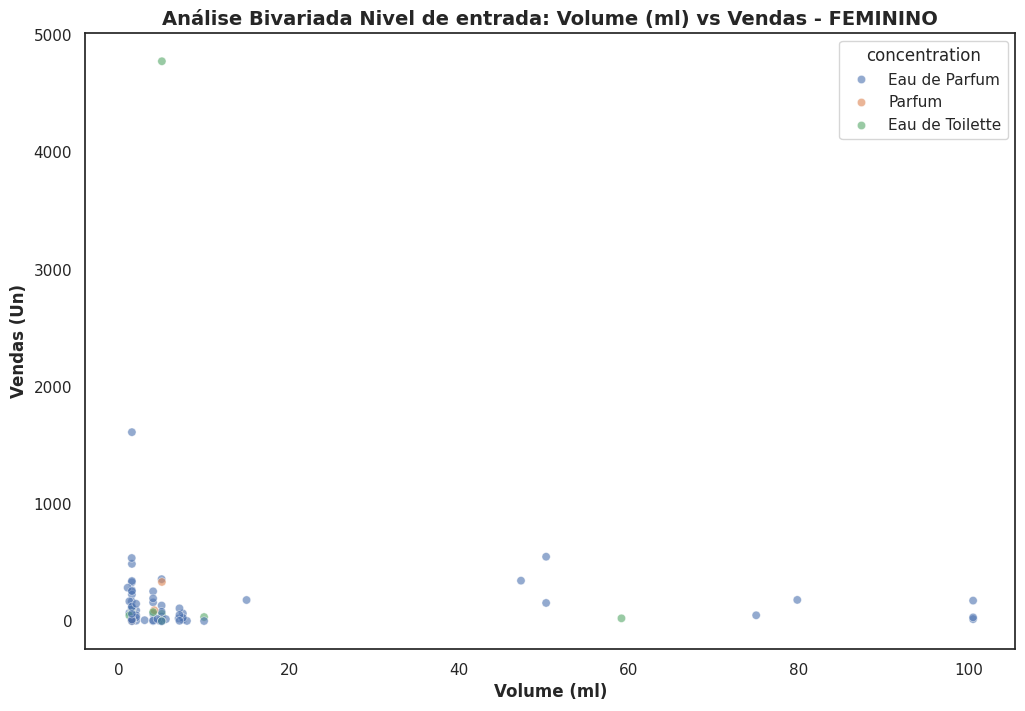

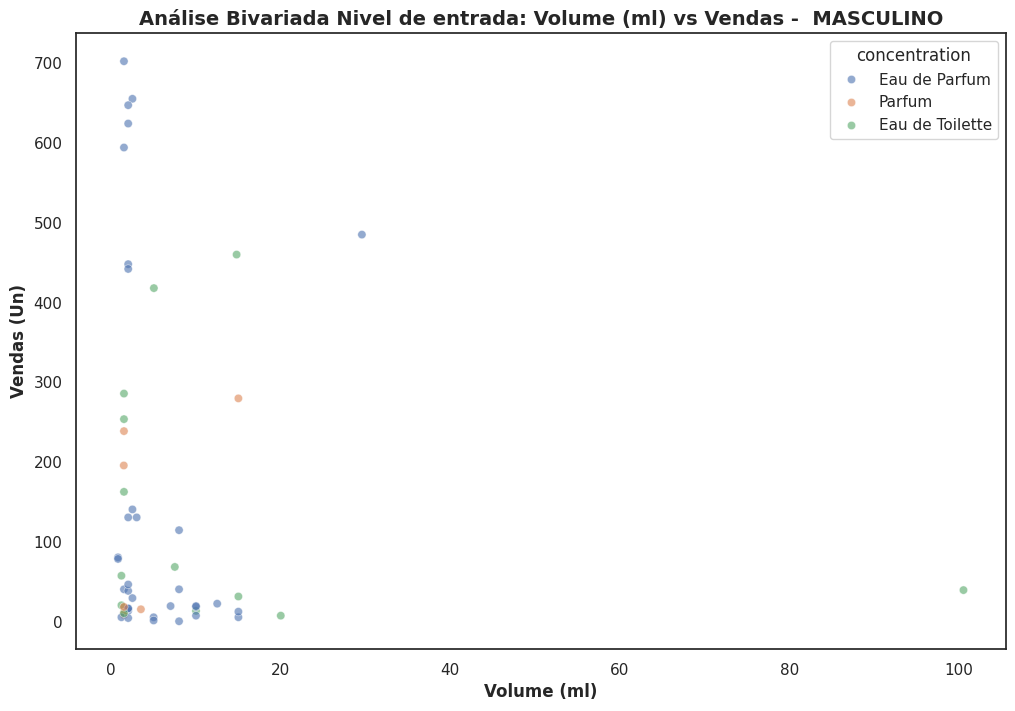

In [198]:
# Filtro para visualização (removendo outliers de volume e preços nulos)
df_clean = df[(df['is_entry_level'] == True) & (df['ml']<200) & (df['price'].notna())].copy()

lista_concentracao = ['Eau de Parfum', 'Eau de Toilette', 'Parfum', 'Eau de Cologne']
df_filtrado_feminino = df_clean[(df_clean['concentration'].isin(lista_concentracao)) &  (df_clean['is_woman'] == 1)]

df_filtrado_masculino = df_clean[(df_clean['concentration'].isin(lista_concentracao)) & (df_clean['is_woman'] == 0)]

# =============================================================================
# 3. VISUALIZAÇÃO (FEMININO)
# =============================================================================

# Paleta institucional: Verde Ânfora e Dourado
cores_boticario = ["#005E41", "#CBA858"]
sns.set_theme(style="white")

# --- Gráfico 1: Volume (ml) vs Preço por Segmento ---
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_filtrado_feminino, x='ml', y='sold', hue='concentration',
     alpha=0.6
)
plt.title('Análise Bivariada Nivel de entrada: Volume (ml) vs Vendas - FEMININO', fontsize=14, fontweight='bold')
plt.xlabel('Volume (ml)', fontweight='bold')
plt.ylabel('Vendas (Un)', fontweight='bold')




# =============================================================================
# 3. VISUALIZAÇÃO (MASCULINO)
# =============================================================================

# Paleta institucional: Verde Ânfora e Dourado
cores_boticario = ["#005E41", "#CBA858"]
sns.set_theme(style="white")

# --- Gráfico 1: Volume (ml) vs Preço por Segmento ---
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_filtrado_masculino, x='ml', y='sold', hue='concentration',
     alpha=0.6
)
plt.title('Análise Bivariada Nivel de entrada: Volume (ml) vs Vendas -  MASCULINO', fontsize=14, fontweight='bold')
plt.xlabel('Volume (ml)', fontweight='bold')
plt.ylabel('Vendas (Un)', fontweight='bold')

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1999 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              1997 non-null   object 
 1   title              1999 non-null   object 
 2   type               1994 non-null   object 
 3   price              1999 non-null   float64
 4   priceWithCurrency  1999 non-null   object 
 5   available          1757 non-null   float64
 6   availableText      1988 non-null   object 
 7   sold               1977 non-null   float64
 8   lastUpdated        1874 non-null   object 
 9   itemLocation       1999 non-null   object 
 10  is_woman           1999 non-null   int64  
 11  concentration      1999 non-null   object 
 12  ml                 1895 non-null   float64
 13  market_segment     1999 non-null   object 
 14  is_entry_level     1999 non-null   bool   
 15  categoria_vendas   1999 non-null   object 
dtypes: bool(1), float64(4), int64


# Limpeza e Processamento de Dados


In [200]:
# Tratamento de Marcas e Preços
df['brand'] = df['brand'].str.strip().str.title()
df['sold'] = df['sold'].fillna(0)
df['price'] = pd.to_numeric(df['price'], errors='coerce').fillna(0)
#df.head()


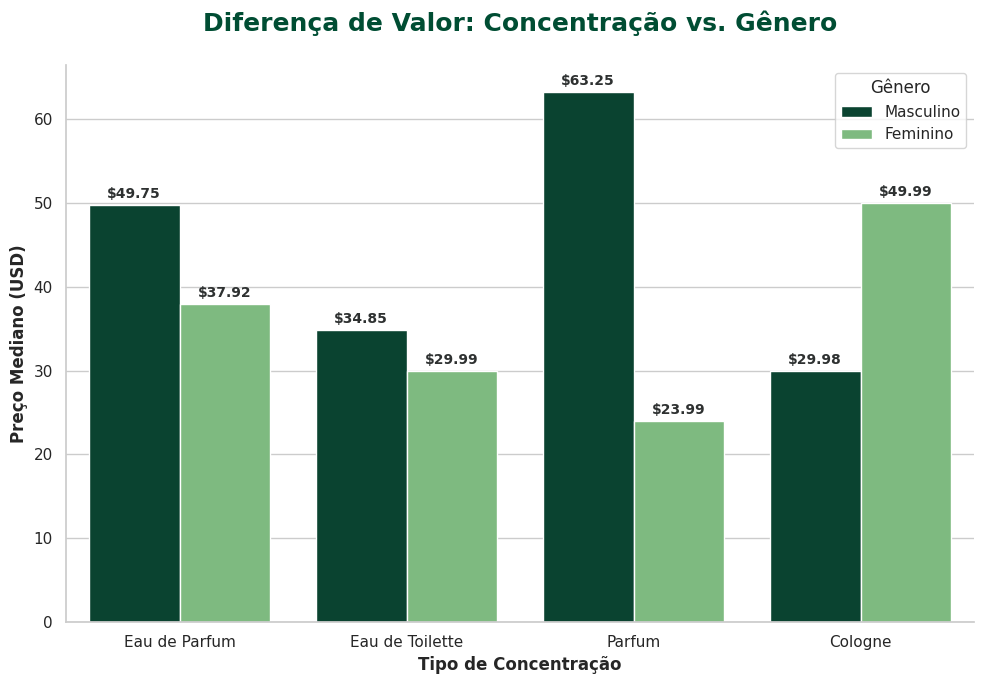

In [201]:
# 1. Configuração de Estilo e Paleta "Boticário" para Gênero
plt.figure(figsize=(10, 7))
sns.set_style("whitegrid")

# Cores: Verde Escuro (Masc) e Verde Médio/Claro (Fem)
# Correção: As chaves do dicionário devem corresponder aos valores da coluna 'is_woman' (0 e 1)
boticario_gender_palette = {0: '#004d33', 1: '#74c476'}

# 2. Criação do Gráfico
main_cats = ['Eau de Parfum', 'Eau de Toilette', 'Parfum', 'Cologne']
bar_plot = sns.barplot(
    data=df[df['concentration'].isin(main_cats)],
    x='concentration',
    y='price',
    hue='is_woman',
    estimator=np.median,
    palette=boticario_gender_palette,
    errorbar=None  # Remove as barras de erro para um visual mais limpo em slides
)

# 3. Customização de Títulos e Eixos
plt.title('Diferença de Valor: Concentração vs. Gênero',
          fontsize=18, fontweight='bold', color='#004d33', pad=25)
plt.ylabel('Preço Mediano (USD)', fontsize=12, fontweight='bold')
plt.xlabel('Tipo de Concentração', fontsize=12, fontweight='bold')

# 4. Adicionando Rótulos de Dados (Valores em cima das barras)
for i in bar_plot.containers:
    bar_plot.bar_label(i, padding=3, fmt='$%.2f', fontsize=10, fontweight='bold', color='#2e3131')

# 5. Ajuste da Legenda e Finalização
# O 'hue' é numérico (0, 1), então a legenda pode precisar de um mapeamento manual ou usar o título da coluna
plt.legend(title='Gênero', title_fontsize='12', loc='upper right', labels=['Masculino', 'Feminino'])
sns.despine()
plt.tight_layout()

plt.show()

/tmp/ipython-input-2694900750.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(


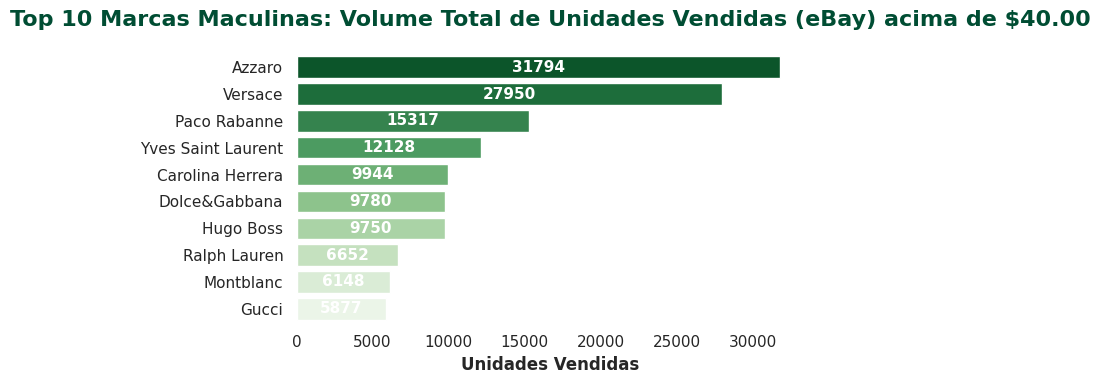

In [202]:


# 1. Preparação dos dados

df_masculino = df[df['is_woman']==0]
df_masculino=df_masculino[df_masculino['price']>=40.00]
top_brands_sales = df_masculino.groupby('brand')['sold'].sum().sort_values(ascending=False).head(10)

# 2. Configuração do Estilo e Paleta Boticário
plt.figure(figsize=(7, 4))
sns.set_style("white")

# Criando a paleta degradê de verdes
boticario_palette = sns.color_palette("Greens_r", n_colors=10)

# 3. Criação do Gráfico
bar_plot = sns.barplot(
    x=top_brands_sales.values,
    y=top_brands_sales.index,
    palette=boticario_palette
)

# 4. Customização de Títulos e Eixos
plt.title('Top 10 Marcas Maculinas: Volume Total de Unidades Vendidas (eBay) acima de $40.00',
          fontsize=16, fontweight='bold', color='#004d33', pad=20)
plt.xlabel('Unidades Vendidas', fontsize=12, fontweight='bold')
plt.ylabel('')

# 5. Adicionando os valores DENTRO das barras (Labels Internos)
for i in bar_plot.containers:
    bar_plot.bar_label(
        i,
        label_type='center',  # Posiciona o texto no centro da barra
        fmt='%g',             # Formatação numérica
        fontsize=11,
        fontweight='bold',
        color='white'         # Cor branca para contraste com o verde
    )

# 6. Finalização
sns.despine(left=True, bottom=True) # Limpa o visual removendo eixos
plt.tight_layout()
plt.show()

/tmp/ipython-input-3756197665.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(


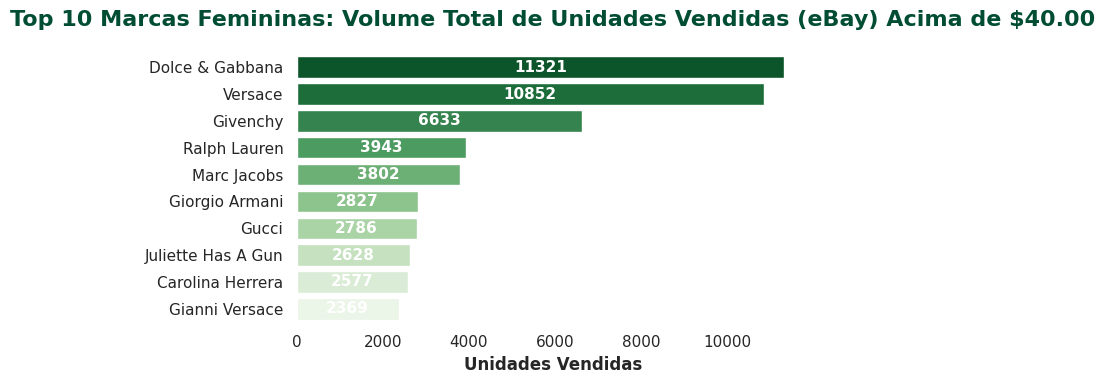

In [203]:


# 1. Preparação dos dados

df_feminino = df[df['is_woman']==1]
df_feminino=df_feminino[df_feminino['price']>=40.00]
top_brands_sales = df_feminino.groupby('brand')['sold'].sum().sort_values(ascending=False).head(10)
top_brands_sales.head()

# 2. Configuração do Estilo e Paleta Boticário
plt.figure(figsize=(7, 4))
sns.set_style("white")

# Criando a paleta degradê de verdes
boticario_palette = sns.color_palette("Greens_r", n_colors=10)

# 3. Criação do Gráfico
bar_plot = sns.barplot(
    x=top_brands_sales.values,
    y=top_brands_sales.index,
    palette=boticario_palette
)

# 4. Customização de Títulos e Eixos
plt.title('Top 10 Marcas Femininas: Volume Total de Unidades Vendidas (eBay) Acima de $40.00',
          fontsize=16, fontweight='bold', color='#004d33', pad=20)
plt.xlabel('Unidades Vendidas', fontsize=12, fontweight='bold')
plt.ylabel('')

# 5. Adicionando os valores DENTRO das barras (Labels Internos)
for i in bar_plot.containers:
    bar_plot.bar_label(
        i,
        label_type='center',  # Posiciona o texto no centro da barra
        fmt='%g',             # Formatação numérica
        fontsize=11,
        fontweight='bold',
        color='white'         # Cor branca para contraste com o verde
    )

# 6. Finalização
sns.despine(left=True, bottom=True) # Limpa o visual removendo eixos
plt.tight_layout()
plt.show()

#Filtrando as top 10 Marcas mais vendidas para ambos os públicos

In [204]:
top_marcas = ['Ralph Lauren','Montblanc','Hugo Boss','Gianni Versace','Juliette Has A Gun',
              'Carolina Herrera','Gucci','Giorgio Armani','Marc Jacobs','Dolce & Gabbana','Versace',
              'Givenchy','Azzaro', 'Paco Rabanne', 'Yves Saint Laurent']
df_filtro_marcas = df[df['brand'].isin(top_marcas)]


#Frequência das Marcas

/tmp/ipython-input-3113998207.py:9: UserWarning: 
The palette list has fewer values (5) than needed (15) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(


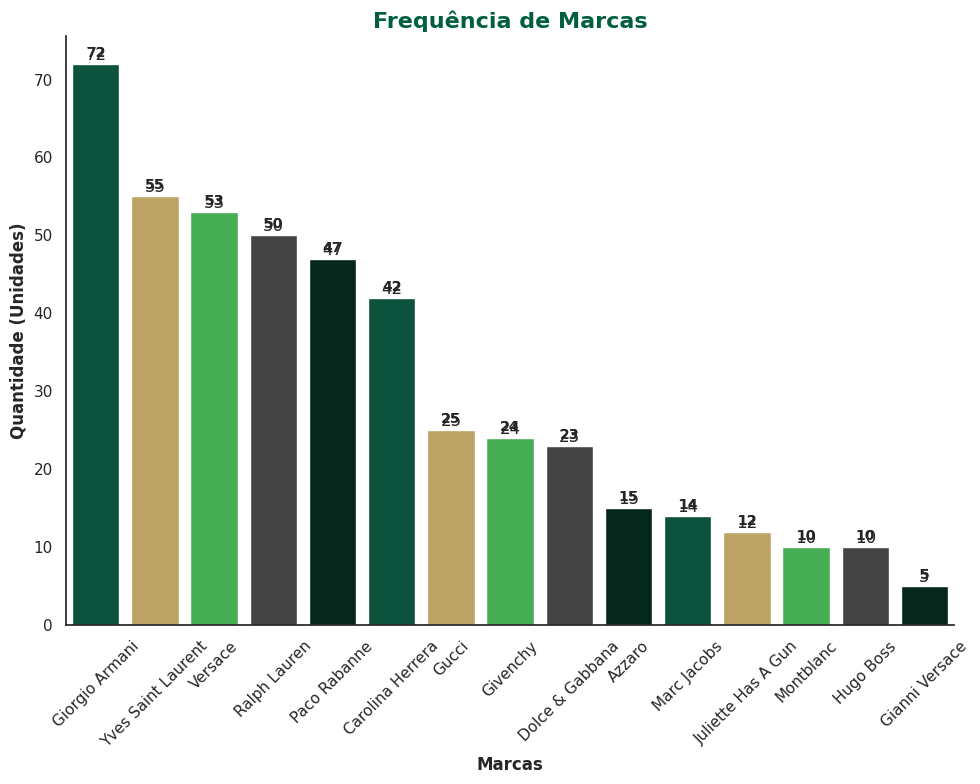

In [205]:
contagem = df_filtro_marcas['brand'].value_counts().reset_index()
contagem.columns = ['brand', 'Frequência']

cores_boticario = ["#005E41", "#CBA858", "#34BF49", "#444444", "#002D1E"]
boticario_palette = sns.color_palette(cores_boticario)

plt.figure(figsize=(10, 8))

ax = sns.barplot(
    x='brand',
    y='Frequência',
    data=contagem,
    palette=cores_boticario,
    hue='brand',
    legend=False
)

# Adicionar Rótulos de Dados (Frequência)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

plt.title('Frequência de Marcas', fontsize=14)
plt.xlabel('Marcas', fontsize=14)
plt.ylabel('Quantidade', fontsize=12)
plt.xticks(rotation=0)

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=3, fontsize=10, fontweight='bold')

# Configurações de Título e Eixos
plt.title('Frequência de Marcas', fontsize=16, color='#005E41', fontweight='bold')
plt.xlabel('Marcas', fontsize=12, fontweight='bold')
plt.ylabel('Quantidade (Unidades)', fontsize=12,fontweight='bold')

# Estilização adicional para legibilidade
plt.xticks(rotation=45)
sns.despine() # Remove as bordas desnecessárias para um visual mais limpo

plt.tight_layout()

In [206]:

print(f"Total de Registros Analisados: {len(df)}")
print(f"Preço Médio Masculino: ${df[df['is_woman']==0]['price'].mean():.2f}")
print(f"Preço Médio Feminino: ${df[df['is_woman']==1]['price'].mean():.2f}")
print(f"Porcentagem de itens 'Entry-Level' (Testers/Amostras): {(df['is_entry_level'].sum()/len(df))*100:.1f}%")

Total de Registros Analisados: 1999
Preço Médio Masculino: $46.48
Preço Médio Feminino: $39.88
Porcentagem de itens 'Entry-Level' (Testers/Amostras): 9.4%


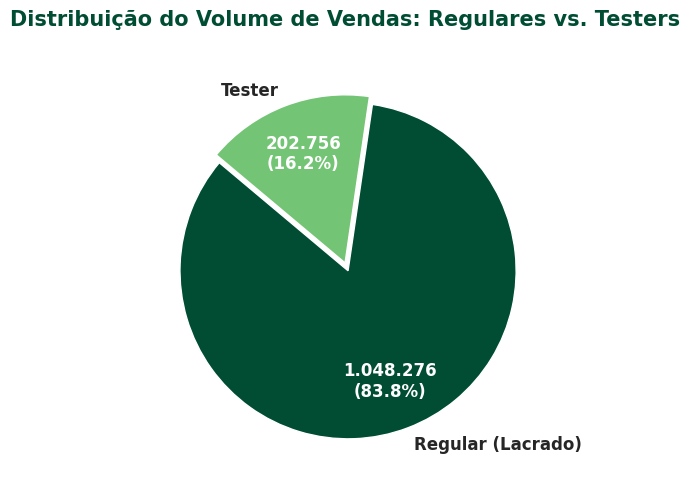

In [207]:

# 1. Agrupamento dos dados (Soma de unidades vendidas)
sales_volume = df.groupby('market_segment')['sold'].sum().sort_values(ascending=False)

# 2. Configuração do Estilo (Cores do Boticário)
plt.figure(figsize=(8, 5))
boticario_palette = ['#004d33', '#74c476']

# Função para exibir Valor Absoluto (com ponto) e Porcentagem
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        formatted_val = f'{val:,.0f}'.replace(',', '.') # Formato 145.672
        return f'{formatted_val}\n({pct:.1f}%)'
    return my_autopct

# 3. Criação do Gráfico de Pizza
wedges, texts, autotexts = plt.pie(
    sales_volume,
    labels=sales_volume.index,
    autopct=make_autopct(sales_volume),
    startangle=140,
    colors=boticario_palette,
    pctdistance=0.7,   # Posiciona o texto mais para o centro
    explode=(0.05, 0), # Pequeno destaque na fatia maior
    textprops={'fontsize': 12, 'fontweight': 'bold'}
)

# 4. Ajustando os valores internos para a cor BRANCA
for autotext in autotexts:
    autotext.set_color('white')

# 5. Título e Ajustes Finais
plt.title('Distribuição do Volume de Vendas: Regulares vs. Testers',
          fontsize=15, fontweight='bold', color='#004d33', pad=20)

plt.tight_layout()
plt.show()

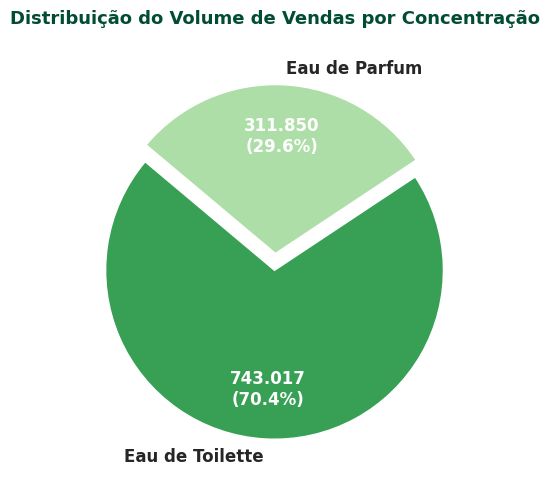

In [208]:


# 1. Agrupamento dos dados por 'concentration' (Soma de unidades vendidas)
# Usamos o df_filtered para focar em Eau de Parfum e Eau de Toilette
df_filtered_ = df[df['concentration'].isin(['Eau de Parfum','Eau de Toilette'])]
sales_volume = df_filtered_.groupby('concentration')['sold'].sum().sort_values(ascending=False)

# 2. Configuração do Estilo (Cores do Boticário)
plt.figure(figsize=(7, 5))
# Geramos a paleta dinamicamente com base no número de categorias
boticario_palette = sns.color_palette("Greens_r", n_colors=len(sales_volume))

# Função para exibir Valor Absoluto (com ponto) e Porcentagem
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        formatted_val = f'{val:,.0f}'.replace(',', '.') # Formato 145.672
        return f'{formatted_val}\n({pct:.1f}%)'
    return my_autopct

# 3. Criação do Gráfico de Pizza
wedges, texts, autotexts = plt.pie(
    sales_volume,
    labels=sales_volume.index,
    autopct=make_autopct(sales_volume),
    startangle=140,
    colors=boticario_palette,
    pctdistance=0.7,
    explode=[0.05] * len(sales_volume), # Aplica o destaque em todas as fatias
    textprops={'fontsize': 12, 'fontweight': 'bold'}
)

# 4. Ajustando os valores internos para a cor BRANCA
for autotext in autotexts:
    autotext.set_color('white')

# 5. Título e Ajustes Finais
plt.title('Distribuição do Volume de Vendas por Concentração',
          fontsize=13, fontweight='bold', color='#004d33', pad=20)

plt.tight_layout()
plt.show()

/tmp/ipython-input-41943038.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


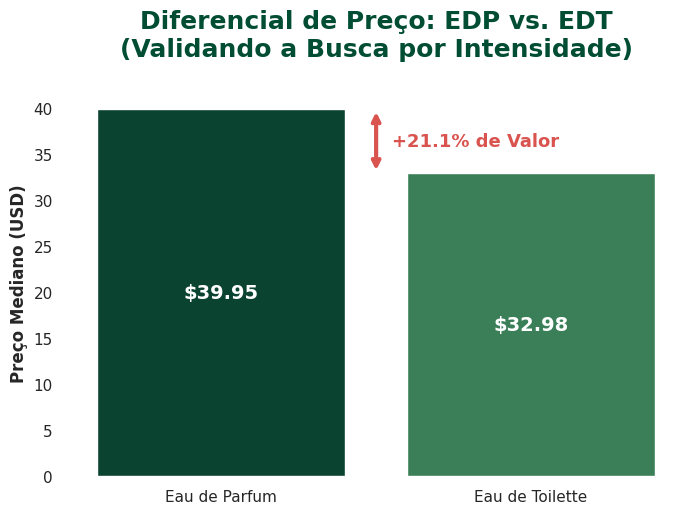

In [209]:

# 1. Preparação: Médias por Concentração
medians = df[df['concentration'].isin(['Eau de Parfum', 'Eau de Toilette'])].groupby('concentration')['price'].median().sort_values(ascending=False)

# 2. Configuração Visual (Paleta Boticário)
plt.figure(figsize=(8, 5))
sns.set_style("white")
colors = {'Eau de Parfum': '#004d33', 'Eau de Toilette': '#2e8b57'}

# 3. Criação do Gráfico
bar_plot = sns.barplot(x=medians.index, y=medians.values, palette=colors, hue=medians.index)

# 4. Adicionando Valores e Anotação de Gap
for i in bar_plot.containers:
    bar_plot.bar_label(i, label_type='center', fmt='$%.2f', fontsize=14, fontweight='bold', color='white')

# Cálculo da porcentagem de diferença para a anotação
edp_val, edt_val = medians['Eau de Parfum'], medians['Eau de Toilette']
diff_pct = ((edp_val - edt_val) / edt_val) * 100

# Adicionando a seta de "Salto de Valor"
plt.annotate('', xy=(0.5, edp_val), xytext=(0.5, edt_val),
             arrowprops=dict(arrowstyle='<->', color='#d9534f', lw=3))
plt.text(0.55, (edp_val + edt_val)/2, f'+{diff_pct:.1f}% de Valor',
         va='center', fontweight='bold', color='#d9534f', fontsize=13)

# 5. Títulos e Acabamento
plt.title('Diferencial de Preço: EDP vs. EDT\n(Validando a Busca por Intensidade)',
          fontsize=18, fontweight='bold', color='#004d33', pad=25)
plt.ylabel('Preço Mediano (USD)', fontsize=12, fontweight='bold')
plt.xlabel('')
plt.legend().remove()
sns.despine(left=True, bottom=True)
plt.show()

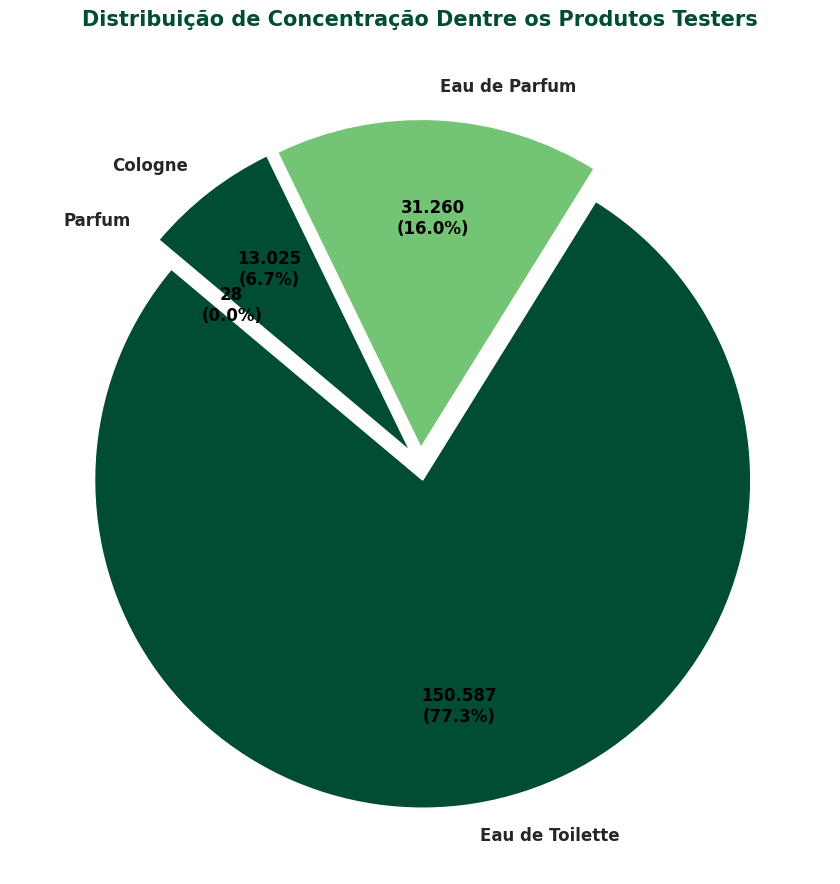

In [210]:

# 1. Preparação dos dados

df_tester = df[df['market_segment']=='Tester']
df_tester = df_tester[df_tester['concentration']!='Outros']
tester = df_tester.groupby('concentration')['sold'].sum().sort_values(ascending=False)
tester.head()

# 2. Configuração do Estilo (Cores do Boticário)
plt.figure(figsize=(15, 9))
boticario_palette = ['#004d33', '#74c476']

# Função para exibir Valor Absoluto (com ponto) e Porcentagem
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        formatted_val = f'{val:,.0f}'.replace(',', '.') # Formato 145.672
        return f'{formatted_val}\n({pct:.1f}%)'
    return my_autopct

# 3. Criação do Gráfico de Pizza
wedges, texts, autotexts = plt.pie(
    tester,
    labels=tester.index,
    autopct=make_autopct(tester),
    startangle=140,
    colors=boticario_palette,
    pctdistance=0.7,
    explode=[0.05] * len(tester), # Aplica o destaque em todas as fatias
    textprops={'fontsize': 12, 'fontweight': 'bold'}
)

# 4. Ajustando os valores internos para a cor BRANCA
for autotext in autotexts:
    autotext.set_color('black')

# 5. Título e Ajustes Finais
plt.title('Distribuição de Concentração Dentre os Produtos Testers',
          fontsize=15, fontweight='bold', color='#004d33', pad=20)

plt.tight_layout()
plt.show()

/tmp/ipython-input-4056615478.py:17: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(


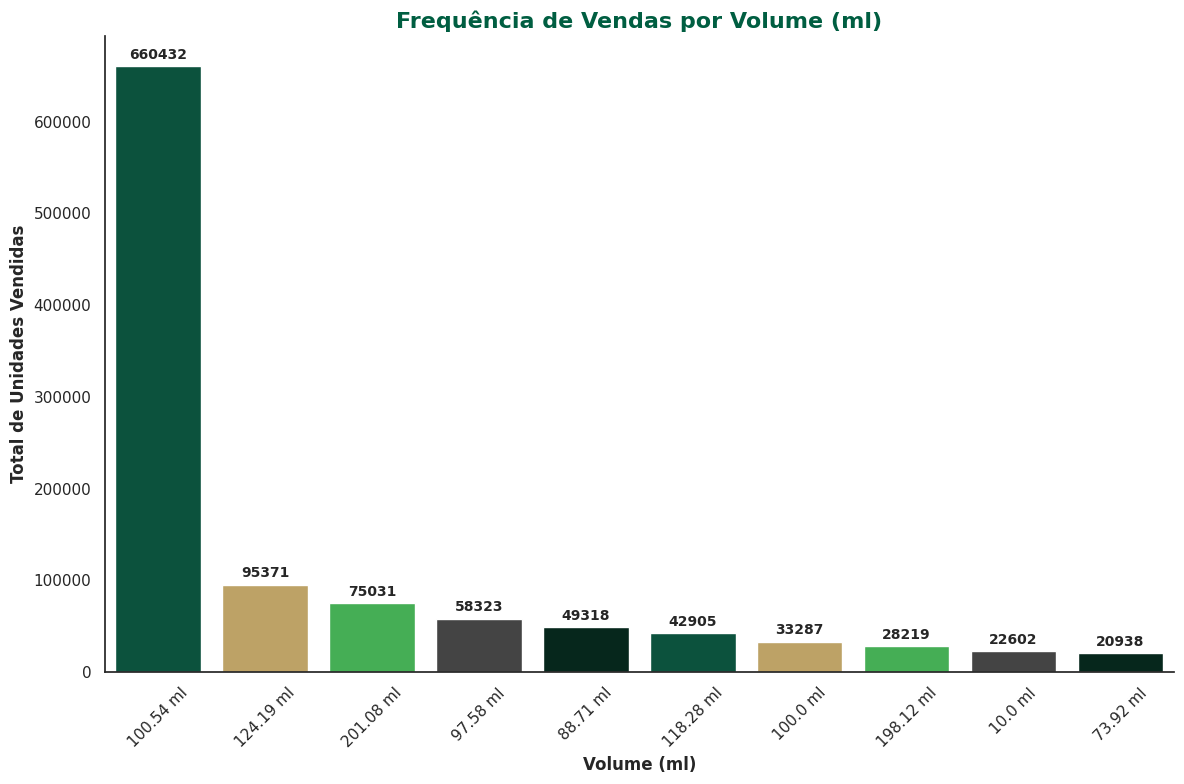

In [211]:

df['sold'] = df['sold'].fillna(0)

# 2. Cálculo da Frequência de Vendas por Volume
# Agrupamos pelo volume (ml) e somamos o total de unidades vendidas (sold)
vendas_por_volume = df.groupby('ml')['sold'].sum().reset_index()
vendas_por_volume.columns = ['ml', 'Total Vendido']

# Selecionamos os 10 volumes com maior volume de vendas para o gráfico
top_vendas_vol = vendas_por_volume.sort_values(by='Total Vendido', ascending=False).head(10).copy()
top_vendas_vol['ml_str'] = top_vendas_vol['ml'].astype(str) + ' ml'

# 3. Visualização Padrão O Boticário
cores_boticario = ["#005E41", "#CBA858", "#34BF49", "#444444", "#002D1E"]

plt.figure(figsize=(12, 8))

ax = sns.barplot(
    x='ml_str',
    y='Total Vendido',
    data=top_vendas_vol,
    palette=cores_boticario,
    hue='ml_str'
)

# Adicionar Rótulos de Dados (Total Vendido)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=3, fontsize=10, fontweight='bold')

# Configurações de Título e Eixos
plt.title('Frequência de Vendas por Volume (ml)', fontsize=16, color='#005E41', fontweight='bold')
plt.xlabel('Volume (ml)', fontsize=12, fontweight='bold')
plt.ylabel('Total de Unidades Vendidas', fontsize=12, fontweight='bold')

# Ocultar a legenda e ajustar layout
if ax.legend_:
    ax.legend_.remove()

plt.xticks(rotation=45)
sns.despine()
plt.tight_layout()
